## **Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Exploratory Data Analysis**

### **Reading the dataset**:

In [87]:
cars_df = pd.read_csv(r"cars_data.csv")

### **Exploring the the dataset with head and shape function:**

In [3]:
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
cars_df.shape

(4340, 8)

### **checking  and Dropping null values if exists**

In [5]:
cars_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### **Checking and Dropping the Duplicates if exists**

In [6]:
cars_df.duplicated().sum()

763

In [7]:
# dropping the duplicates
cars_df.drop_duplicates(inplace=True)

In [8]:
cars_df.shape

(3577, 8)

### **Info of the data:**

In [9]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


### **Univariate Analysis**

In [10]:
cars_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [11]:
for column in cars_df.columns:
    print(cars_df[column].value_counts(normalize=True))
    print()

Maruti Swift Dzire VDI               0.015096
Maruti Alto 800 LXI                  0.013419
Maruti Alto LXi                      0.011742
Maruti Alto LX                       0.008387
Maruti Swift VDI BSIV                0.007828
                                       ...   
Toyota Innova 2.5 E 8 STR            0.000280
Nissan Micra XL CVT                  0.000280
Mahindra Scorpio VLX AT 2WD BSIII    0.000280
Toyota Corolla AE                    0.000280
Hyundai i20 Magna 1.4 CRDi           0.000280
Name: name, Length: 1491, dtype: float64

2017    0.096729
2012    0.094493
2015    0.092815
2014    0.089740
2013    0.083310
2018    0.082471
2016    0.079117
2011    0.069052
2010    0.058708
2009    0.047246
2019    0.045289
2008    0.036064
2007    0.032709
2006    0.025999
2005    0.017053
2020    0.012580
2004    0.010623
2003    0.006150
2002    0.005032
2001    0.004473
2000    0.003355
1998    0.002516
1999    0.002516
1997    0.000839
1996    0.000559
1995    0.000280
1992    0.

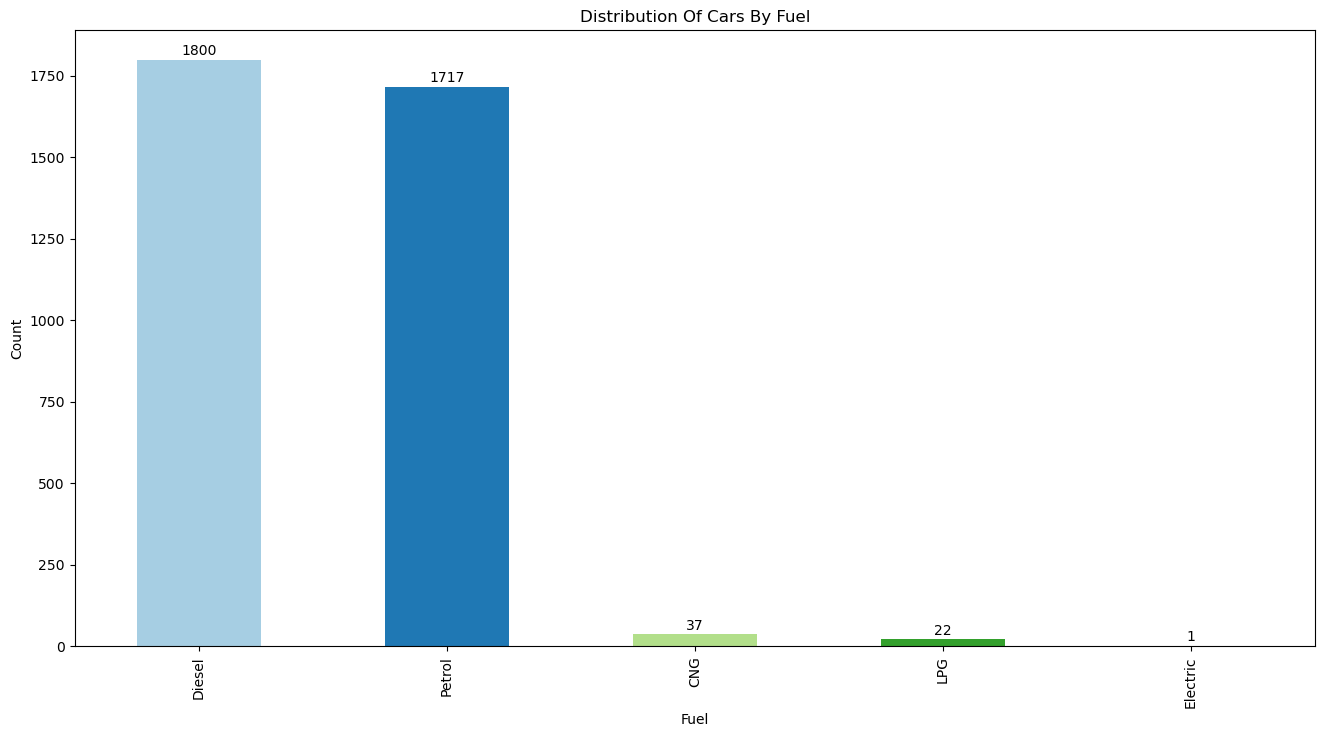

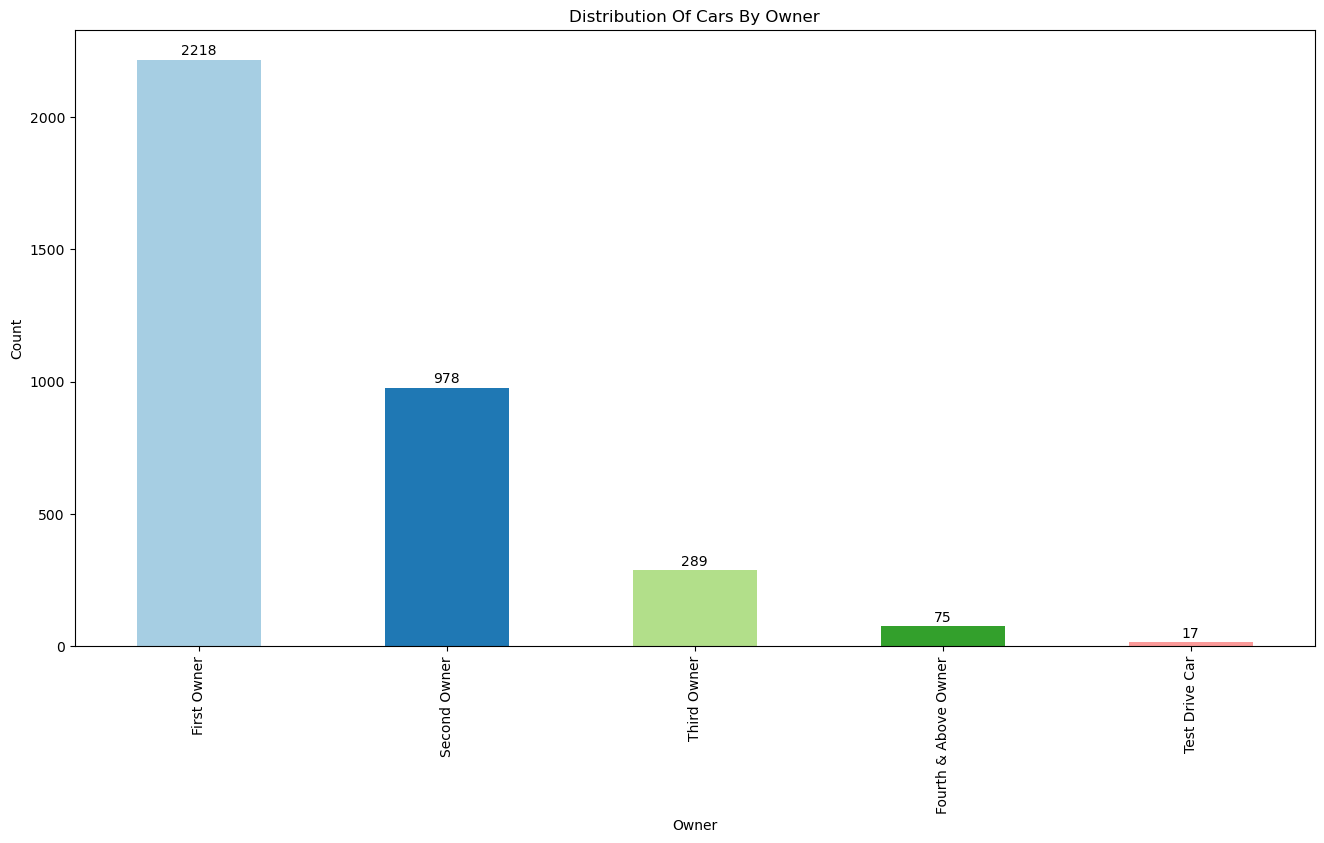

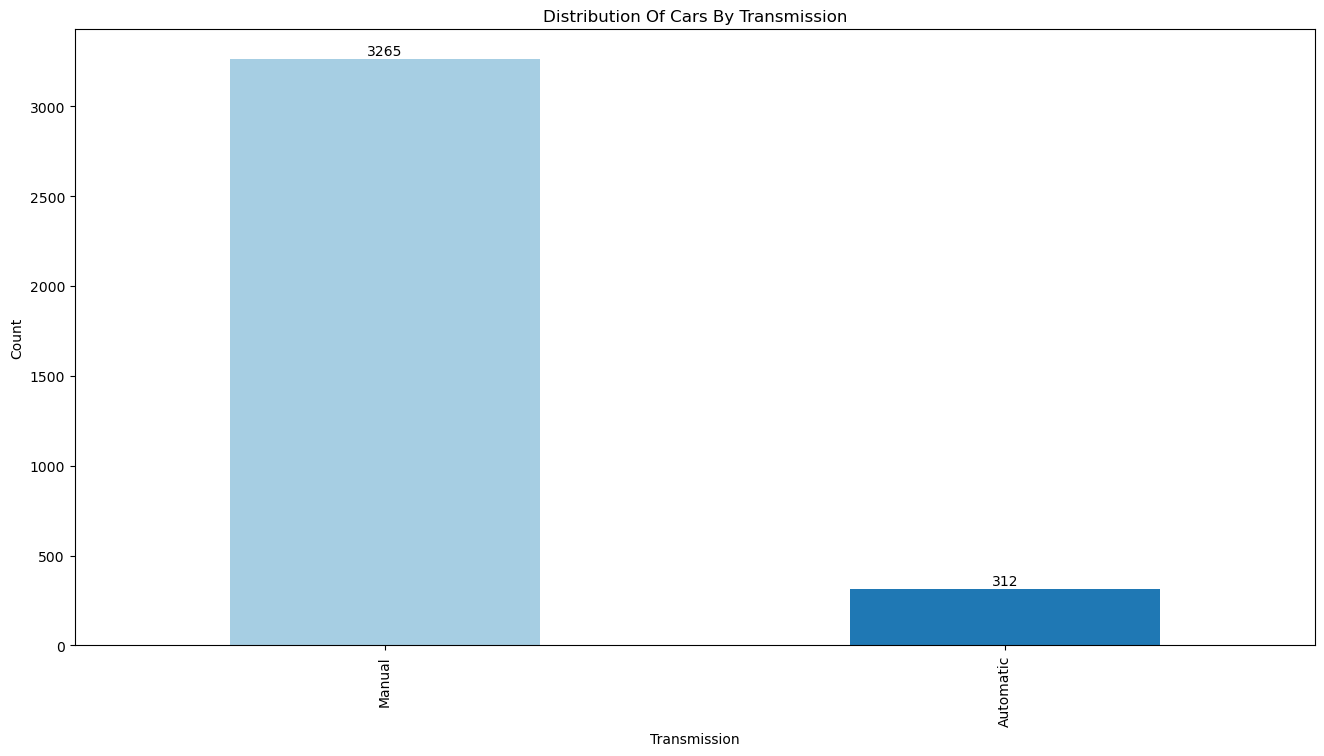

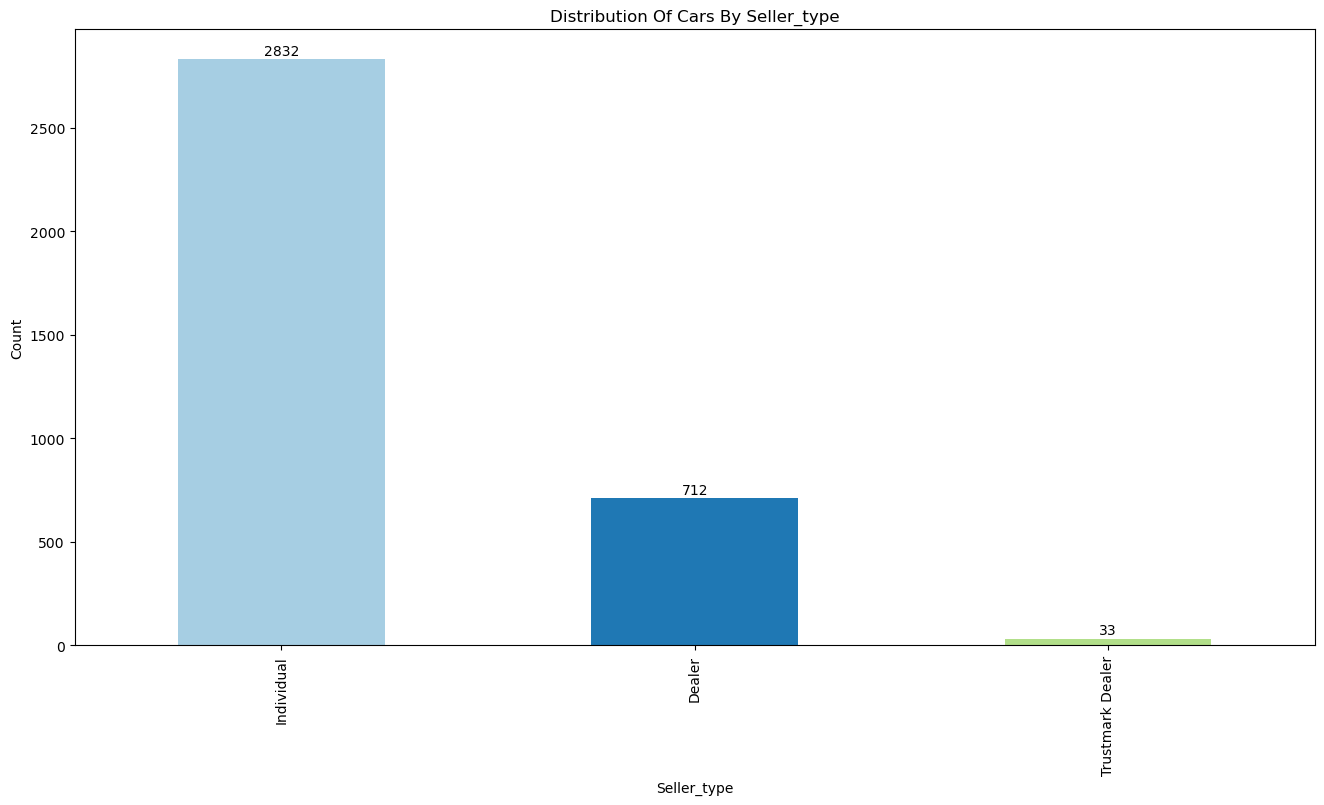

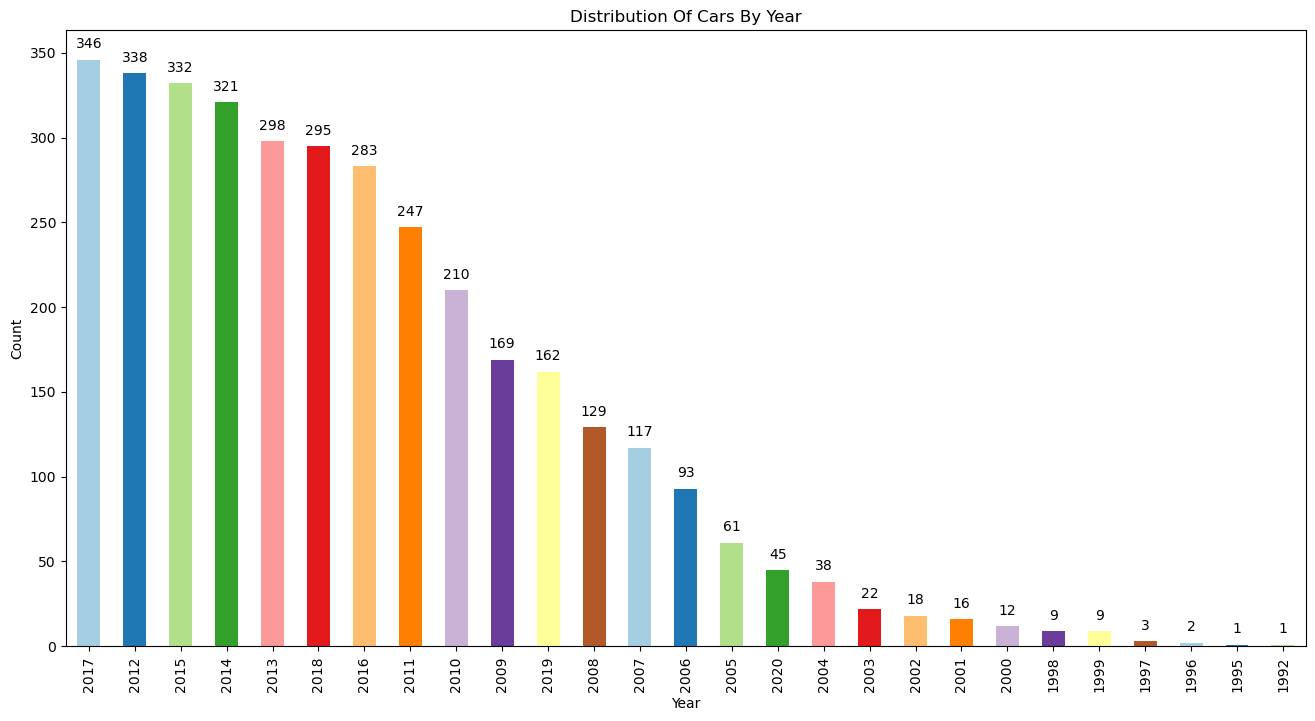

In [12]:
features = ["fuel","owner","transmission","seller_type","year"]

palette = sns.color_palette("Paired")

for feature in features:
    plt.figure(figsize=(16,8))
    colors = palette[:cars_df[feature].nunique()]
    cars_df[feature].value_counts().plot(kind="bar",color =colors)
    plt.title(f"Distribution Of Cars By {str.capitalize(feature)}")
    for i, value in enumerate(cars_df[feature].value_counts()):
        plt.text(i, value + 5, str(value), ha ='center', va ="bottom")
    plt.xlabel(f"{str.capitalize(feature)}")
    plt.ylabel("Count")
    plt.show()

### Disribution of Cars By Brands

In [13]:
cars_df["brand"] = cars_df["name"].apply(lambda x: x.split(" ")[0])

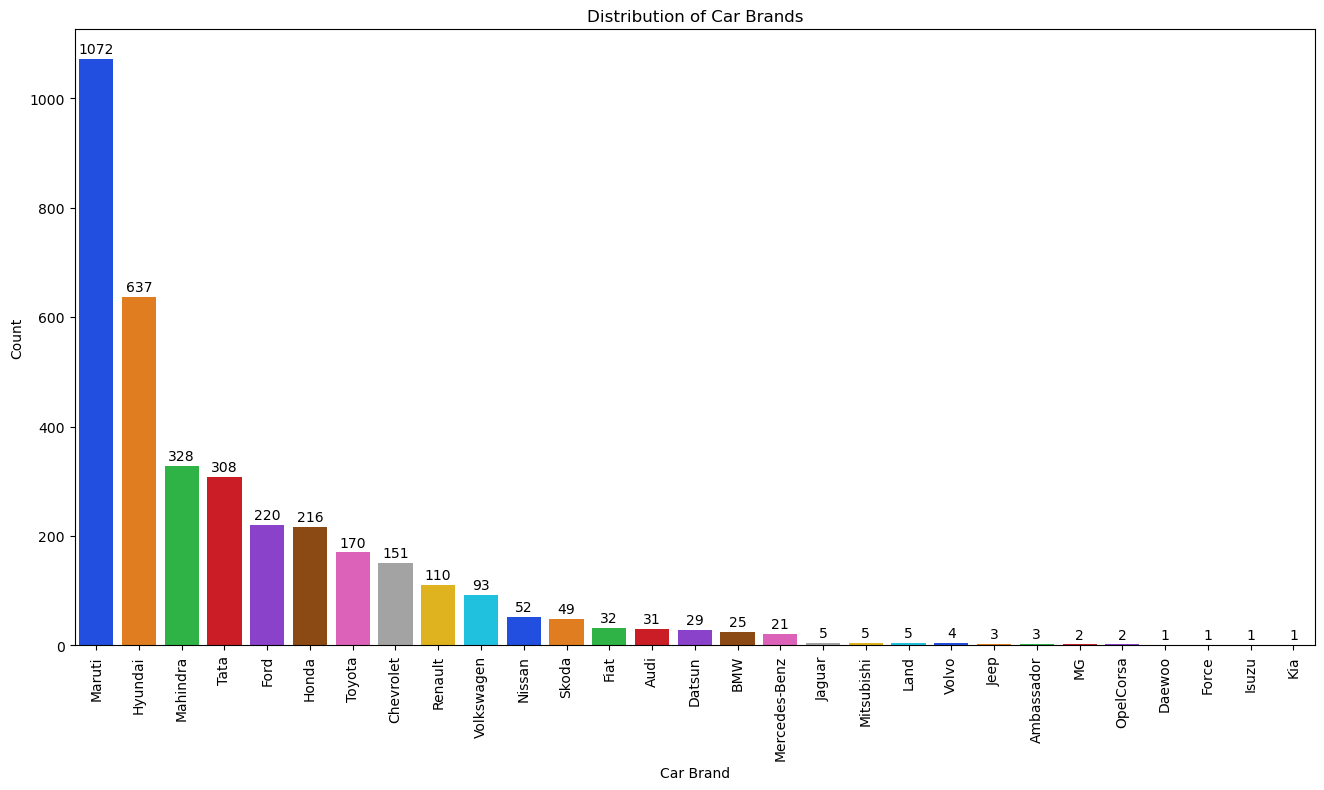

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(x='brand', data=cars_df,order=cars_df['brand'].value_counts().index,palette="bright",)
plt.title('Distribution of Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Count')
for i ,value in enumerate(cars_df['brand'].value_counts()):
    plt.text(i,value +5 ,s = str(value),ha ="center" ,va ="bottom")
plt.xticks(rotation=90)
plt.show()

### Distribution of Top 50 Car Models

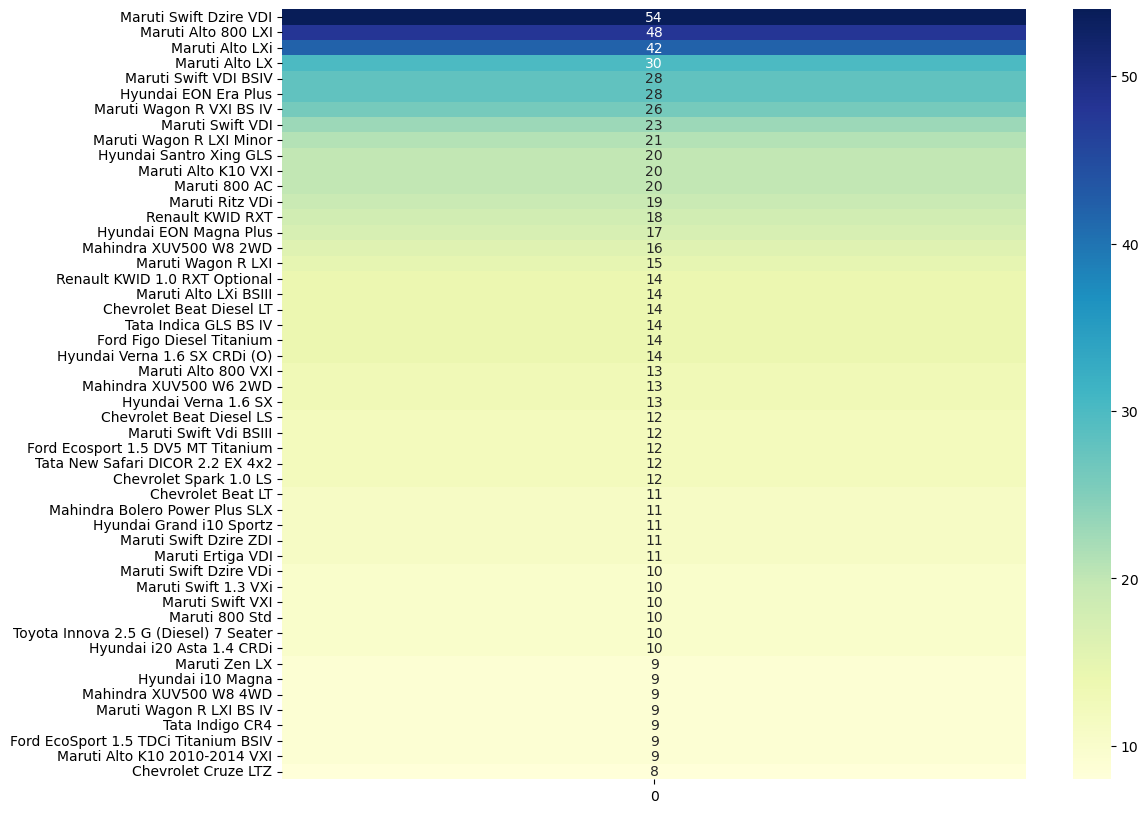

In [15]:
top_50_cars = cars_df["name"].value_counts().head(50)
plt.figure(figsize=(12,10))
sns.heatmap(top_50_cars.values.reshape(-1,1), annot=True, fmt="d", cmap="YlGnBu", yticklabels=top_50_cars.index)
plt.show()

### **INSIGHTS From Univariate Analysis:**

* No of cars based on **Fuel Type** are: 
    * Top two are **Diesel** (1,800 cars) 50.15%  and **Petrol** (1,717 cars) 48.15%.  
    * Combined they account for more than **98%** of the cars by fuel type.
    
* No of cars based on **Transmission Type** are:
    * **Manual** (3,265 cars) 91.6%  and **Automatic** (312 cars) 8.4%.
    
* No of cars based on **Owner Type** are:
    * Top two are **First owner** (2,218 cars) 61.9%  and **Second owner** (978 cars) 27.4%.  
    * Combined they account for more than **88%** of the cars by owner type.
    
* No of cars based on **Seller Type** are:
    * **Individual** (2,832 cars) 79.3% and **Dealer** (712 cars) 19.7%.
    
* No of cars based on **Year the car was bought** are:
    * Top five Years are from **2017** (346 cars) 9.6%, **2012** (338 cars) 9.4%, **2015** (332 cars) 9.3%, **2014** (321 cars) 8.9%, **2013** (298 cars) 8.3%.  
    * Combined they account for more than **45%** of the cars sold by owners based on the year the cars were bought.
    
* **Top 5 selling cars based on the model** are:
    * **Maruti Swift Dzire** VDI (54 cars) 1.51%
    * **Maruti Alto 800 LXI** (48 cars) 1.34%
    * **Maruti Alto LXi** (42 cars) 1.18%
    * **Maruti Alto LX** (30 cars) 0.84% 
    * **Maruti Swift VDI BSIV** (28 cars) 0.78%
    * **Hyundai EON Era Plus** (28 cars) 0.78%
  
  **Since 5th place was shared by both Hyundai and Maruti, we have 6 cars that account for more than 5% of total cars sold.**
    
* **Top 5 selling cars based on the Brand** are:
    * **Maruti** (1072 cars) 30%
    * **Hyundai** (637 cars) 17.8%
    * **Mahindra** (328 cars) 9.2%
    * **Tata** (308 cars) 8.6% 
    * **Ford** (220 cars) 6.1% 
  
  **These top 5 brands account for more than 70% of the cars sold.**


### **Total sales of cars by :"Model_name","fuel","owner","transmission","seller_type","year" and Brand**

**since there are many car model we are taking only top 50 selling cars**

### **Total sales of Top 50 cars:**

In [16]:
total_sales_of_all_cars = cars_df["selling_price"].sum()
total_sales_of_all_cars

1695185163

**Total sales of all cars is 169.5 crore INR**

In [17]:
 Total_sales = cars_df[cars_df["name"].isin(list(top_50_cars.index))].groupby("name")["selling_price"].sum().sort_values(ascending = False)

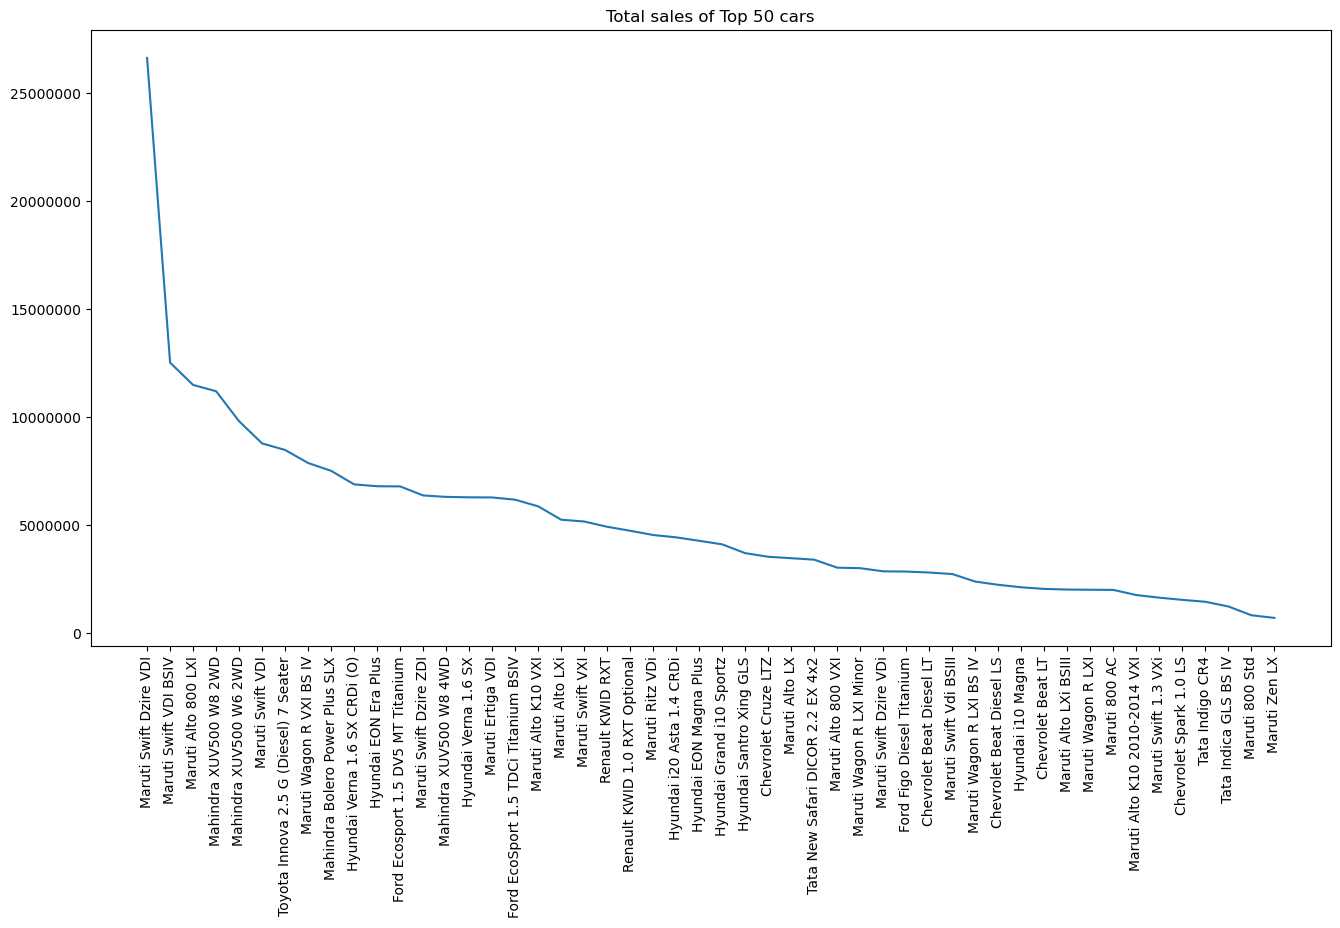

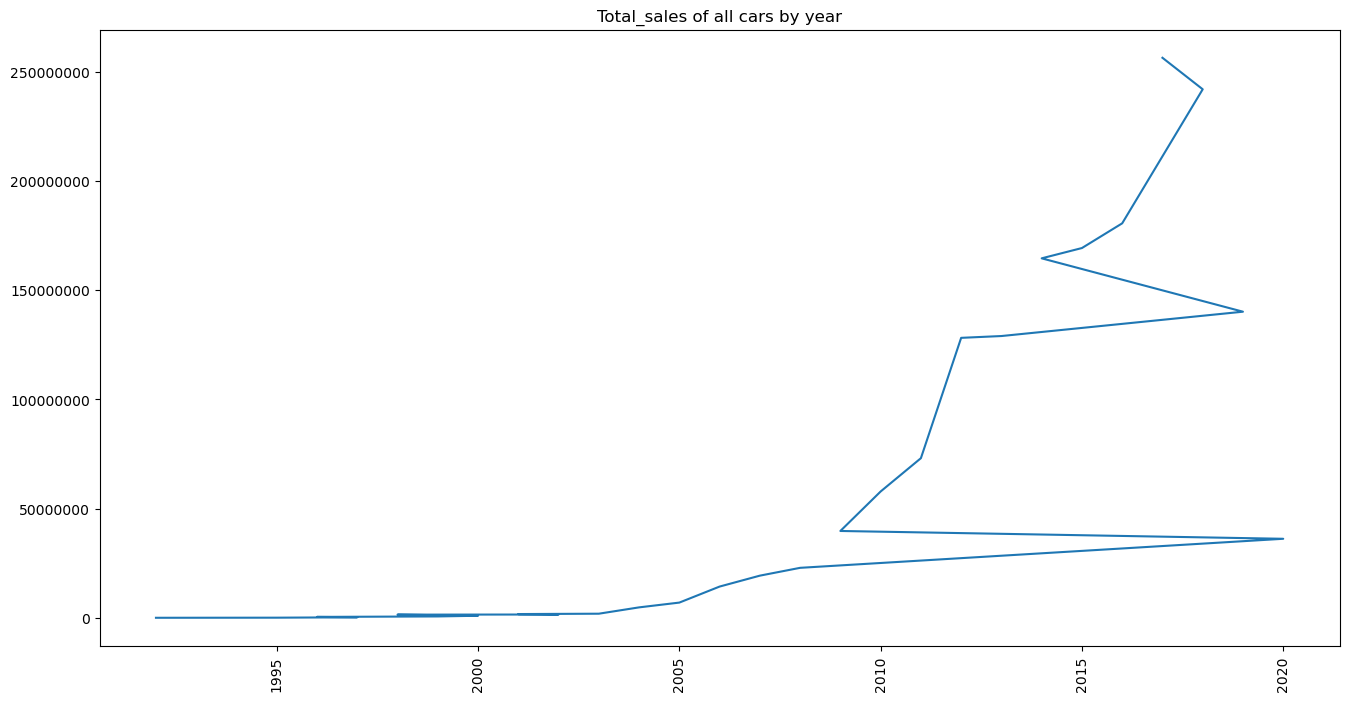

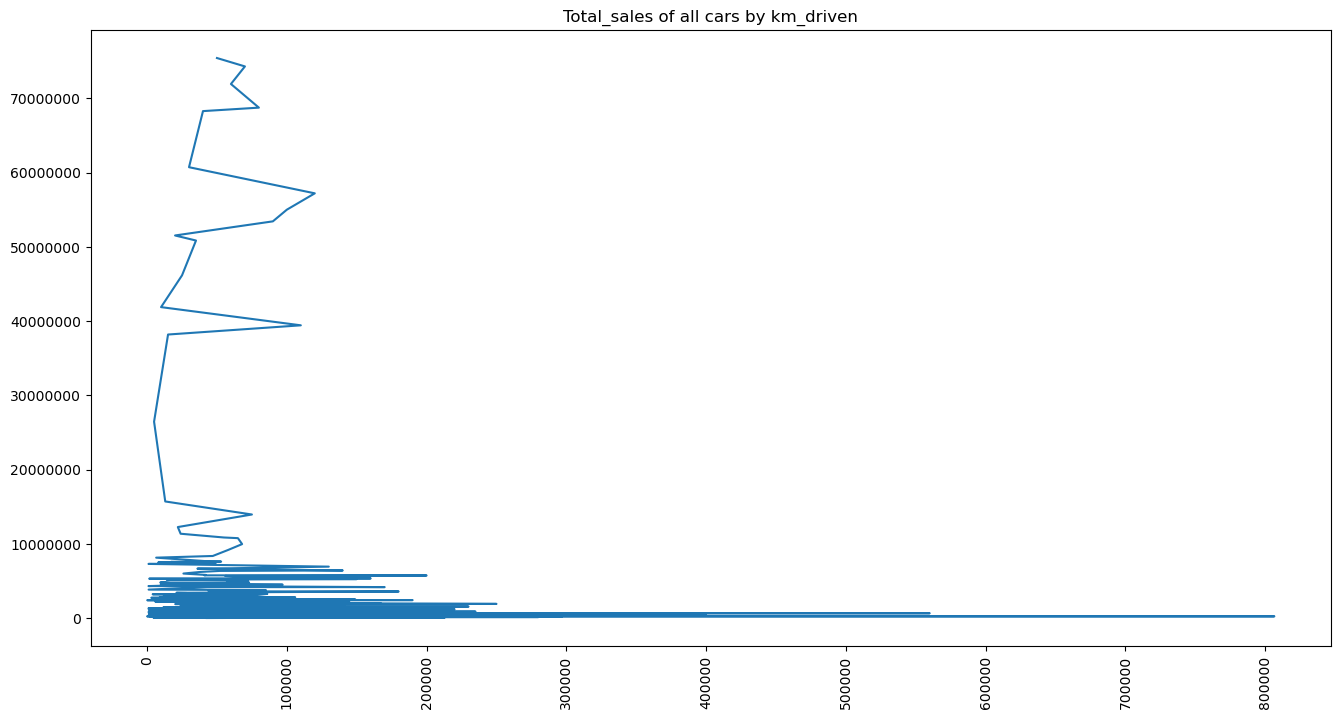

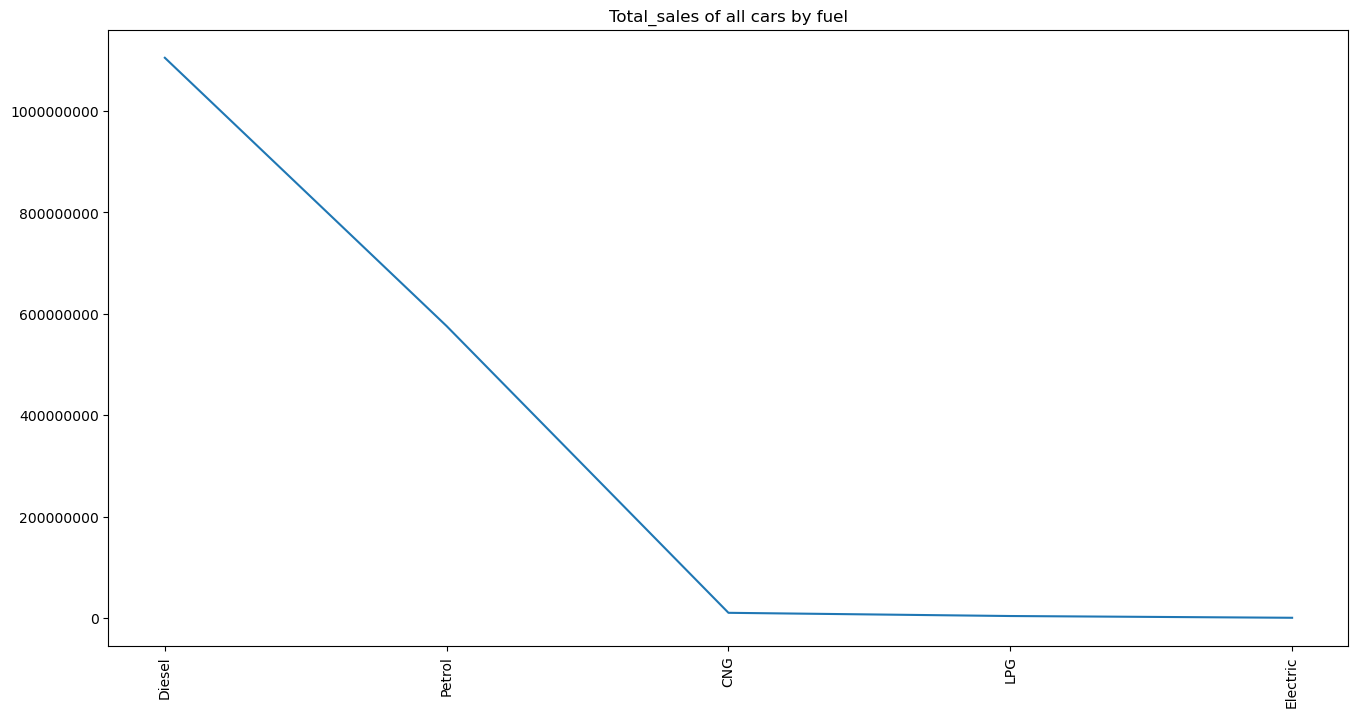

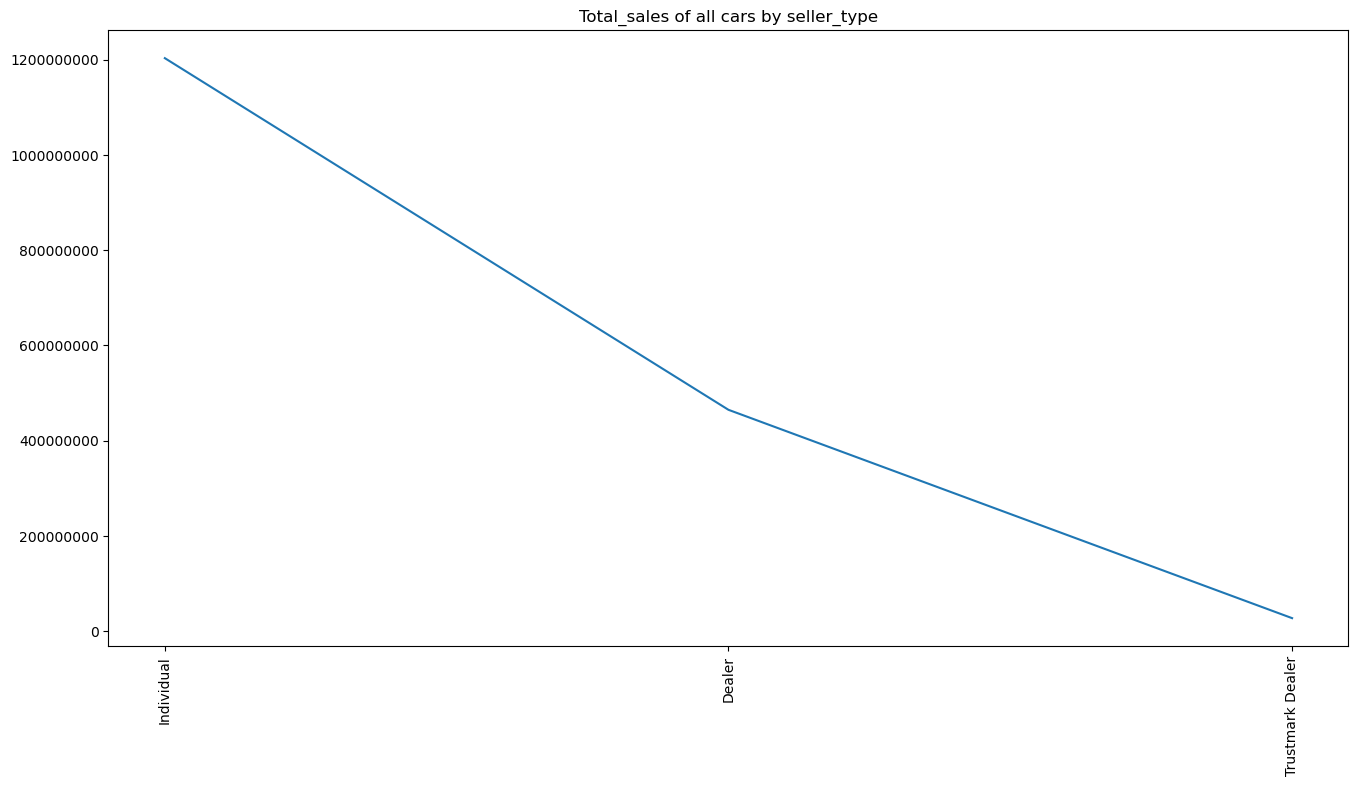

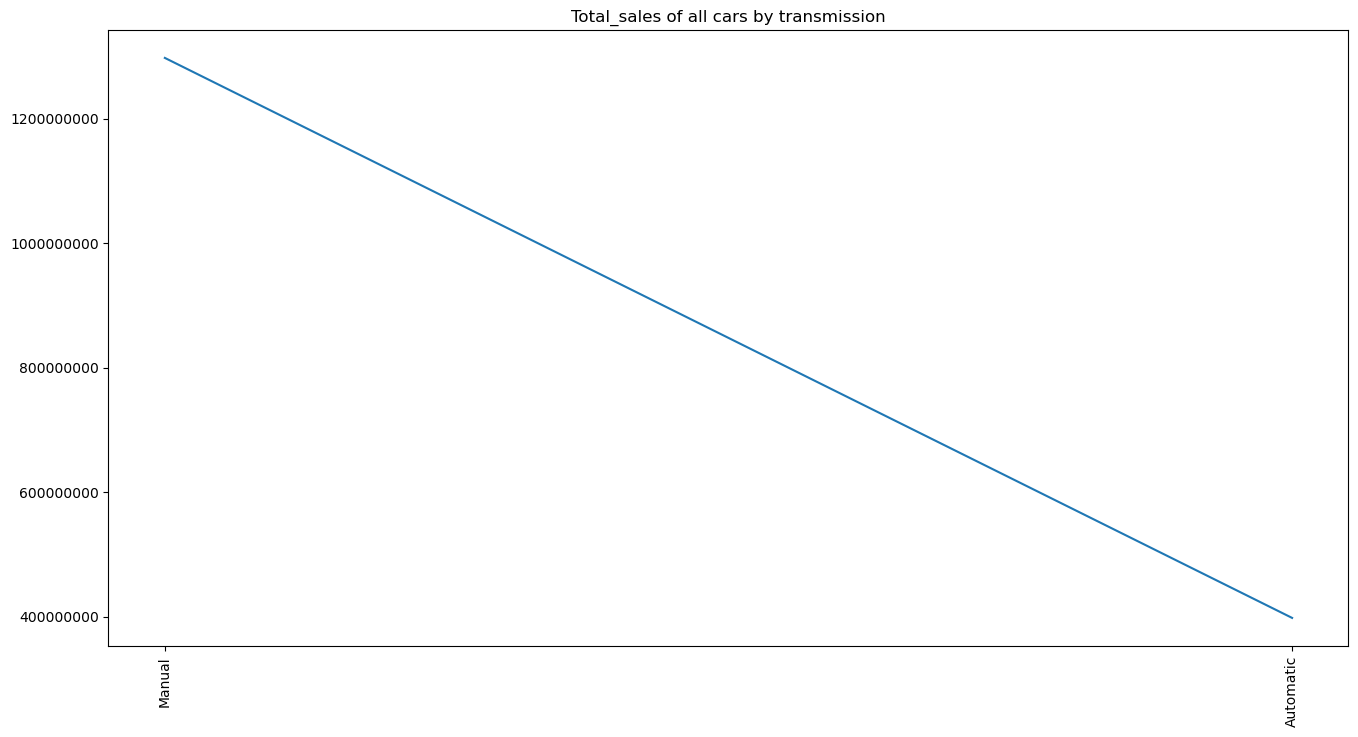

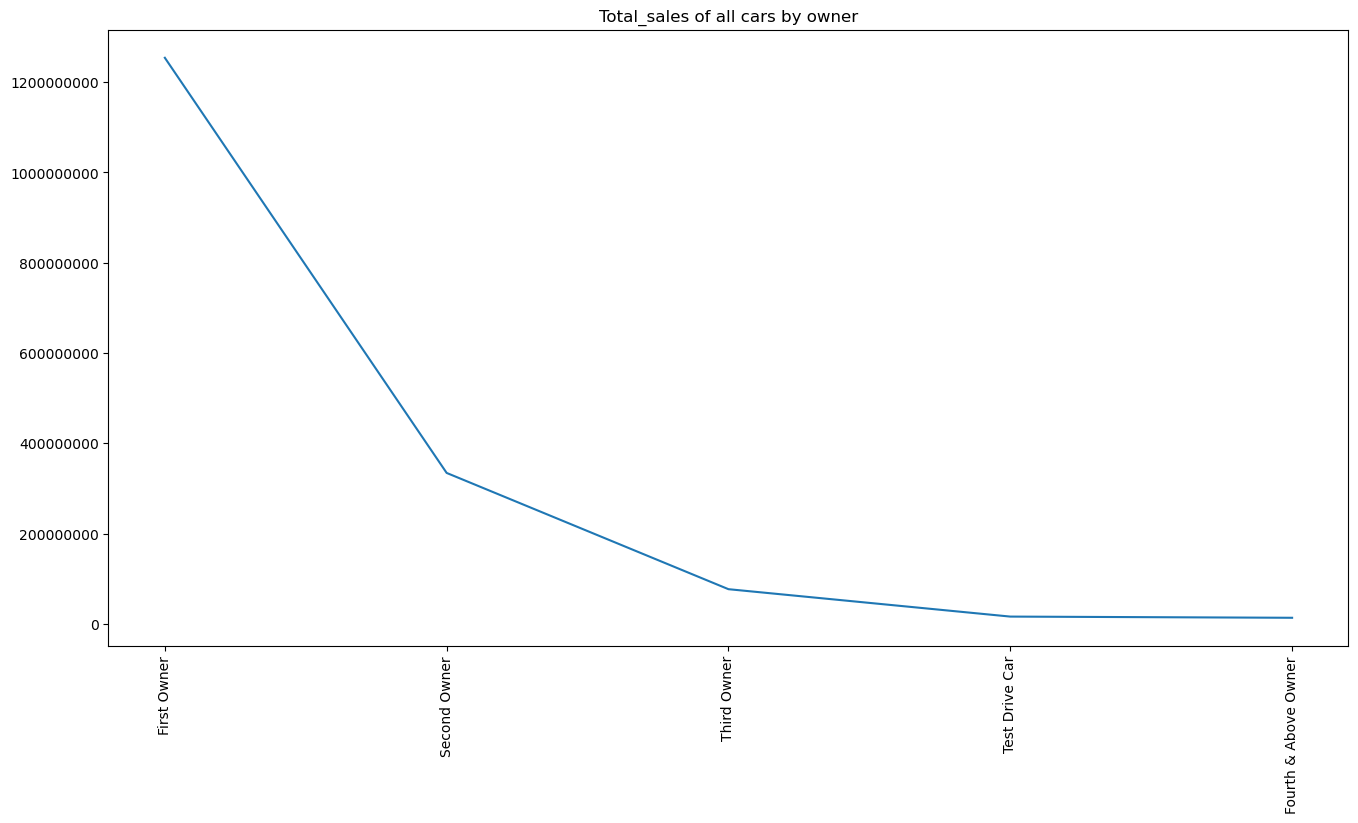

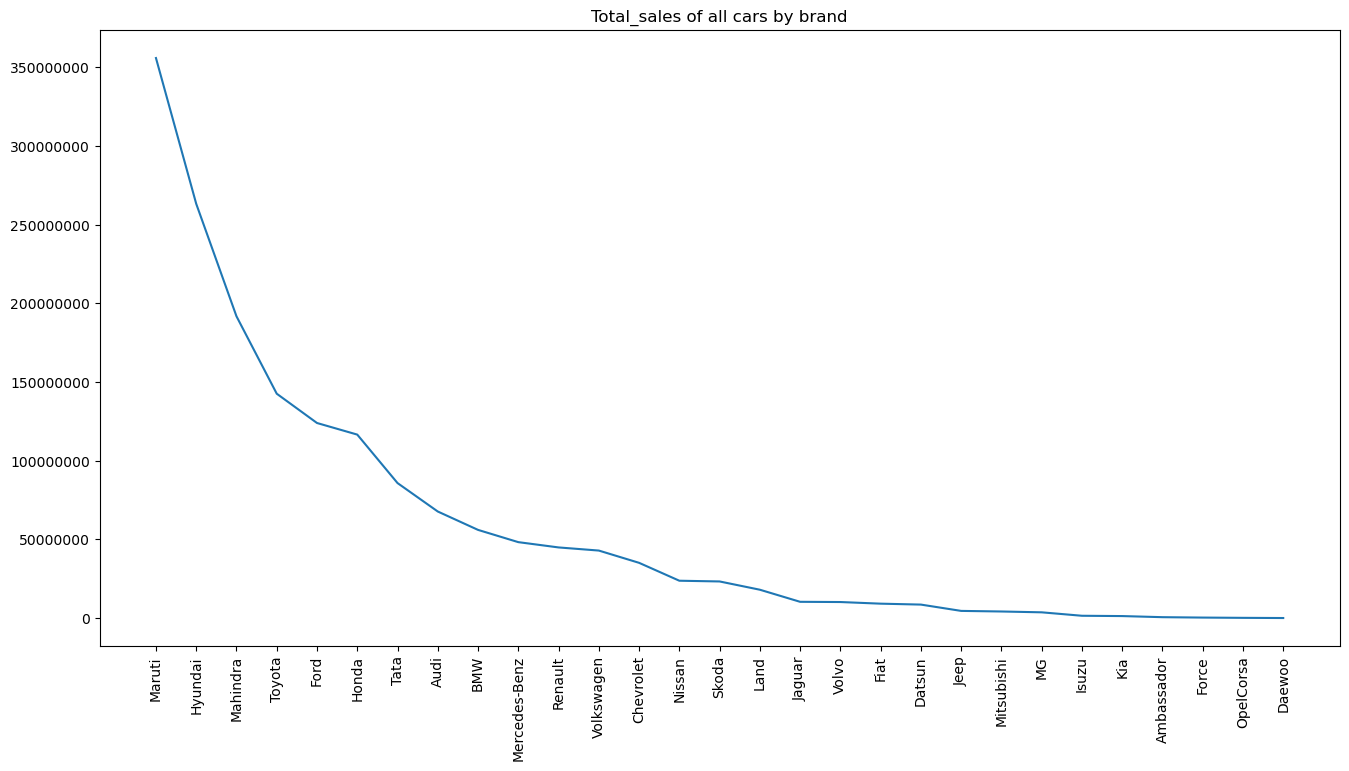

In [18]:
for i in cars_df.columns.drop("selling_price"):
    plt.figure(figsize=(16,8))
    plt.ticklabel_format(style='plain') 
    if i == "name":
        Total_sales = cars_df[cars_df["name"].isin(list(top_50_cars.index))].groupby("name")["selling_price"].sum().sort_values(ascending = False)
        plt.title("Total sales of Top 50 cars")
    else:
        Total_sales = cars_df.groupby(i)["selling_price"].sum().sort_values(ascending = False)
        plt.title(f"Total_sales of all cars by {i}")
    plt.plot(Total_sales.index ,Total_sales.values)
    plt.xticks(rotation =90)
    plt.show()

##### **since the charts looks more volatile for some features, we will not use those volatile ones like km driven for insights**

### **Insights From Bivariate Analysis By Total Sales:**

* **Total** sales of all cars amount to **163.3 crores INR**
 
* out of which  **Maruti** Brand cars alone sold for close to **35 crores INR** and Maruti **swift Dzire vdi**  alone sold   for more than **25 crores INR**

* **Diesel** Based cars sold for more than **100 crores INR**

* **Individual** seller and **First owner** sold for close to 100 crores INR, so we can infer that most of the cars sold by first owner are sold by them itself not through dealer
 
* **Manual** Transmission cars are sold for more than **120 crores INR**

### **Median selling price of cars by :"Model_name","fuel","owner","transmission","seller_type","year" and Brand**

In [19]:
 cars_df.columns.drop("selling_price")

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'brand'],
      dtype='object')

### **Median selling price of Top 50 cars:**

#### **since there are many car model we are taking only top 50 selling cars**

In [20]:
cars_df[cars_df["name"].isin(list(top_50_cars.index))].groupby("name")["selling_price"].median()

name
Chevrolet Beat Diesel LS                 185000.0
Chevrolet Beat Diesel LT                 200000.0
Chevrolet Beat LT                        165000.0
Chevrolet Cruze LTZ                      340000.0
Chevrolet Spark 1.0 LS                   132000.0
Ford EcoSport 1.5 TDCi Titanium BSIV     650000.0
Ford Ecosport 1.5 DV5 MT Titanium        565000.0
Ford Figo Diesel Titanium                190000.0
Hyundai EON Era Plus                     230000.0
Hyundai EON Magna Plus                   245000.0
Hyundai Grand i10 Sportz                 375000.0
Hyundai Santro Xing GLS                  162500.0
Hyundai Verna 1.6 SX                     480000.0
Hyundai Verna 1.6 SX CRDi (O)            512500.0
Hyundai i10 Magna                        235000.0
Hyundai i20 Asta 1.4 CRDi                400000.0
Mahindra Bolero Power Plus SLX           675000.0
Mahindra XUV500 W6 2WD                   660000.0
Mahindra XUV500 W8 2WD                   680500.0
Mahindra XUV500 W8 4WD                   6500

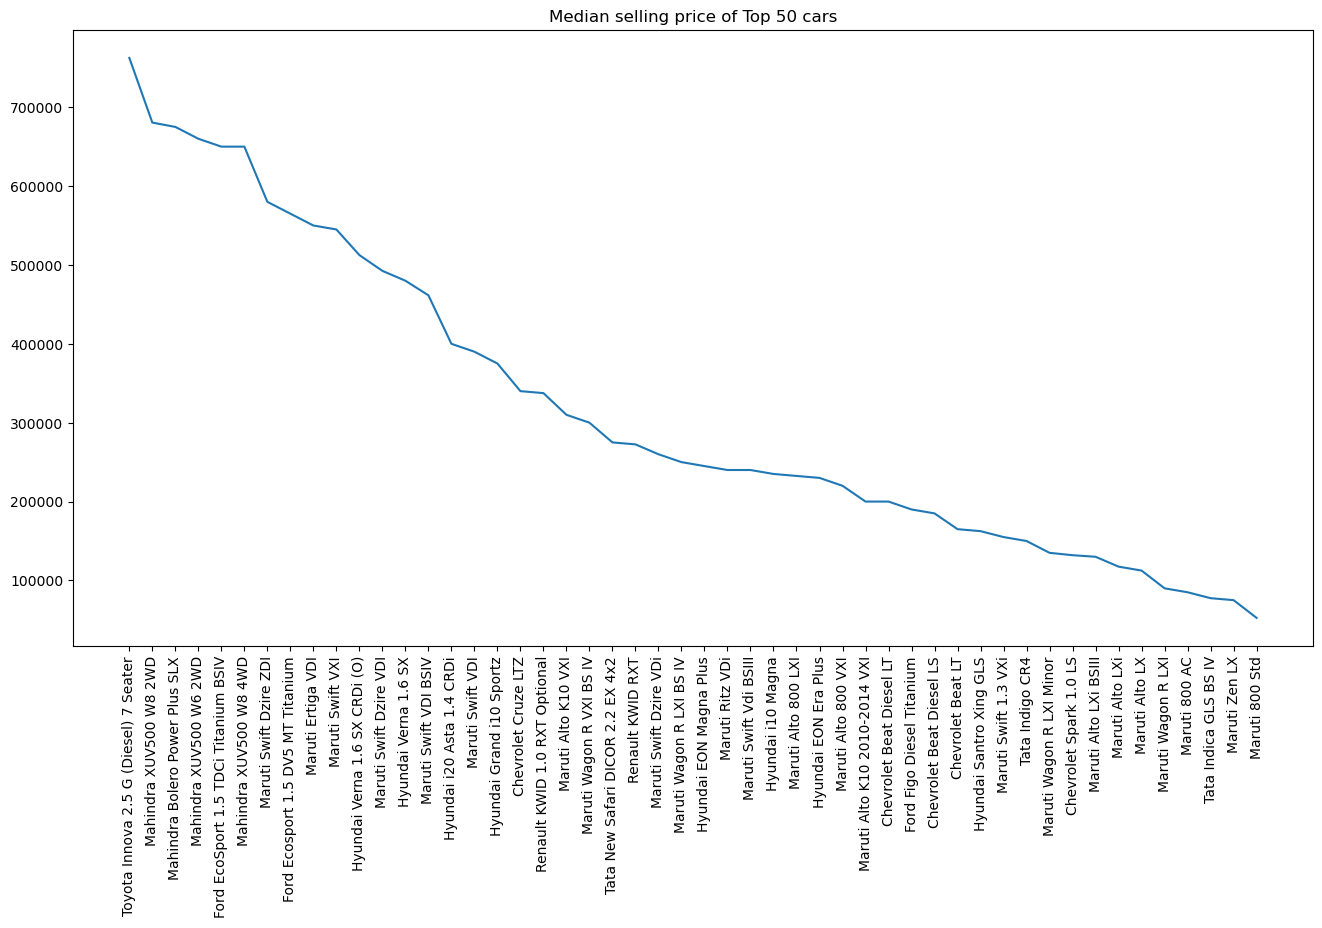

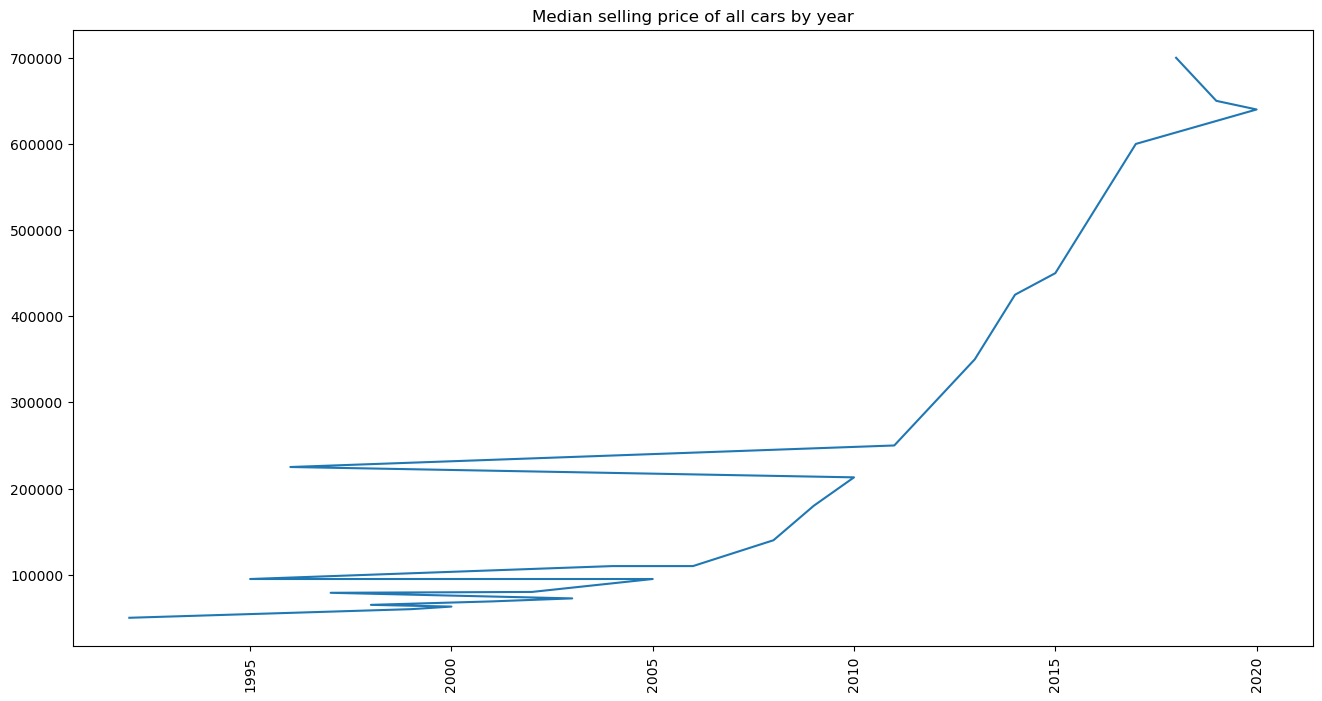

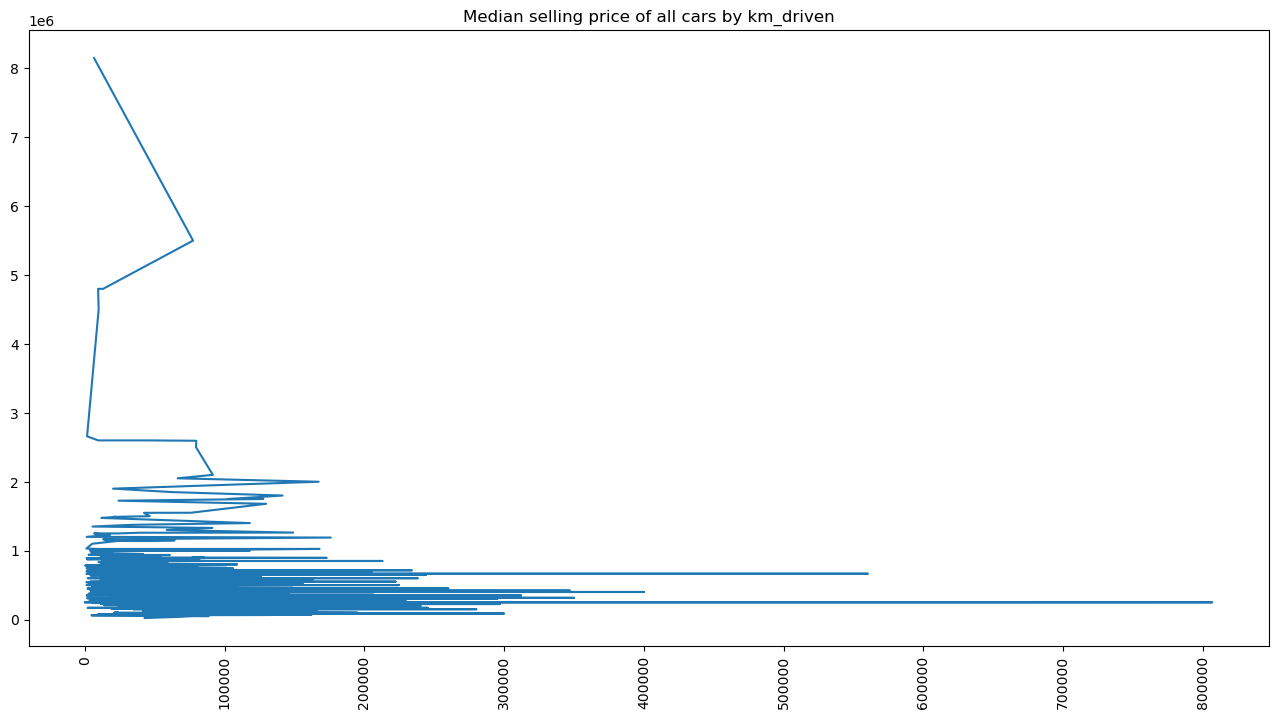

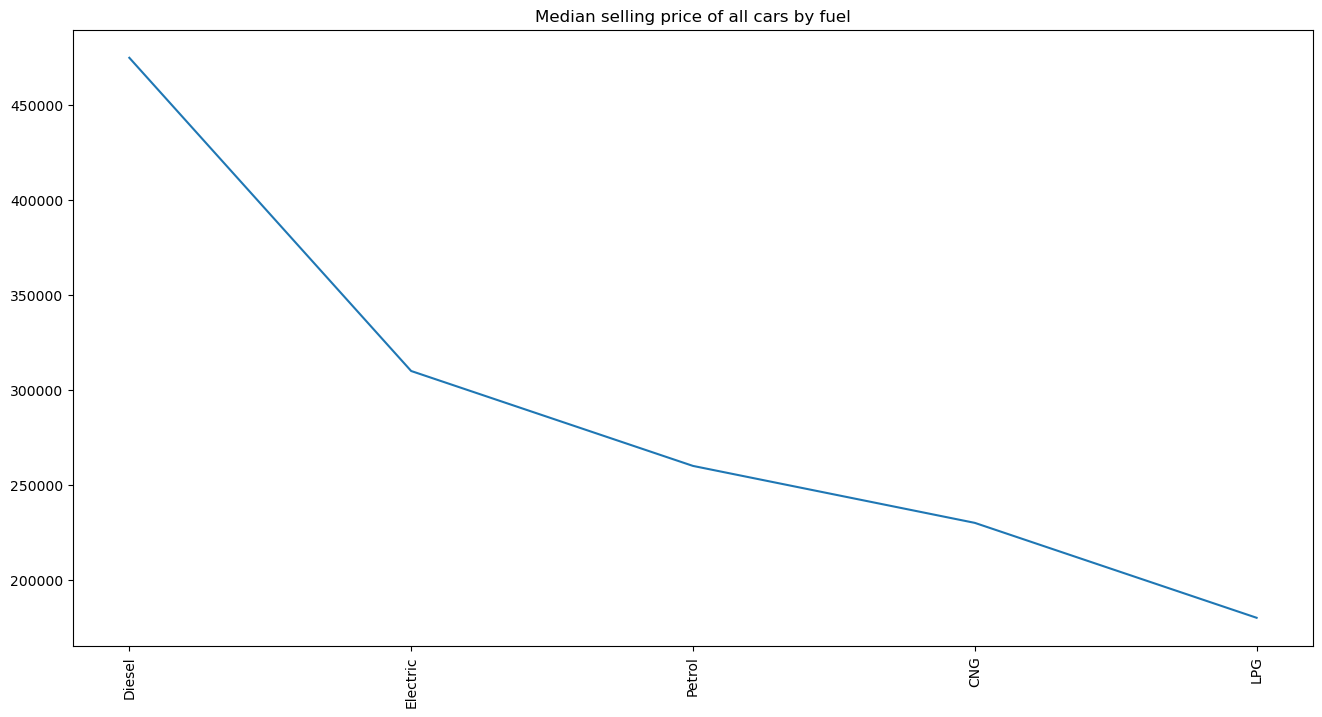

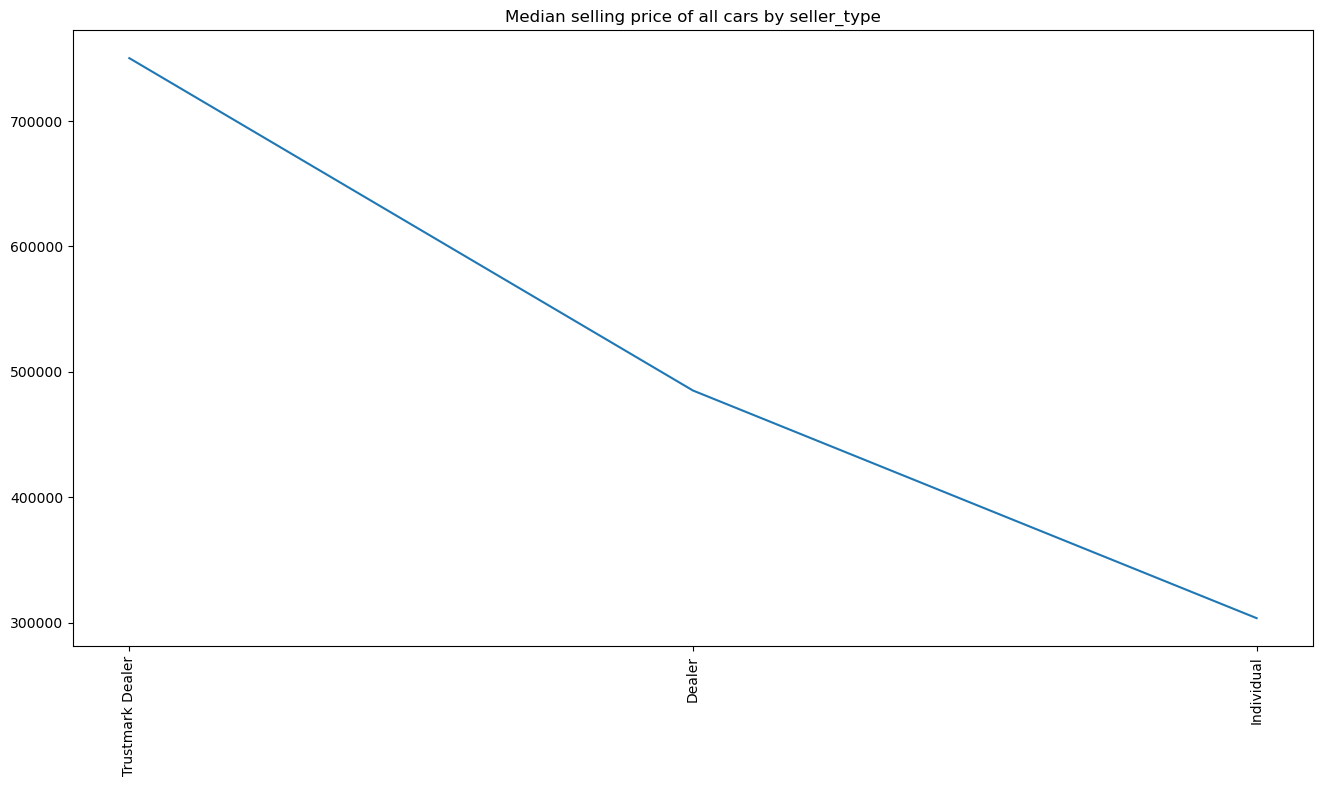

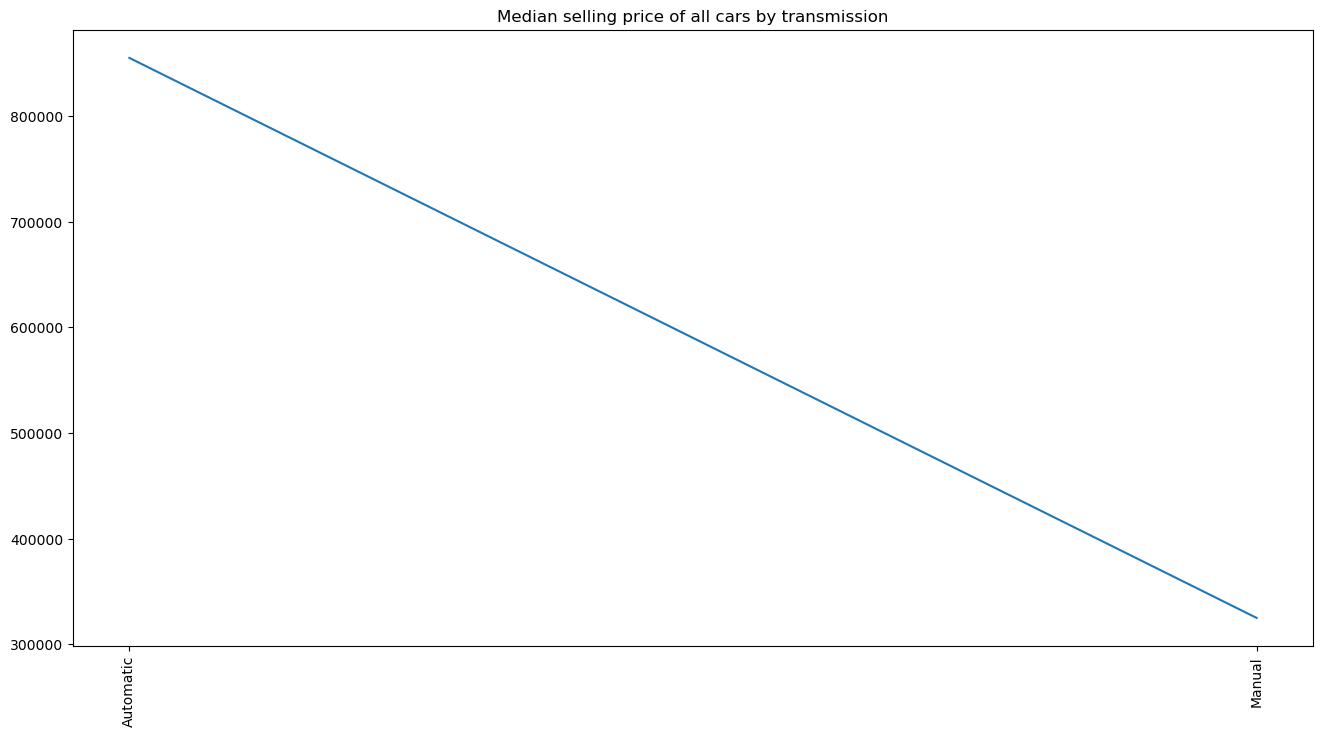

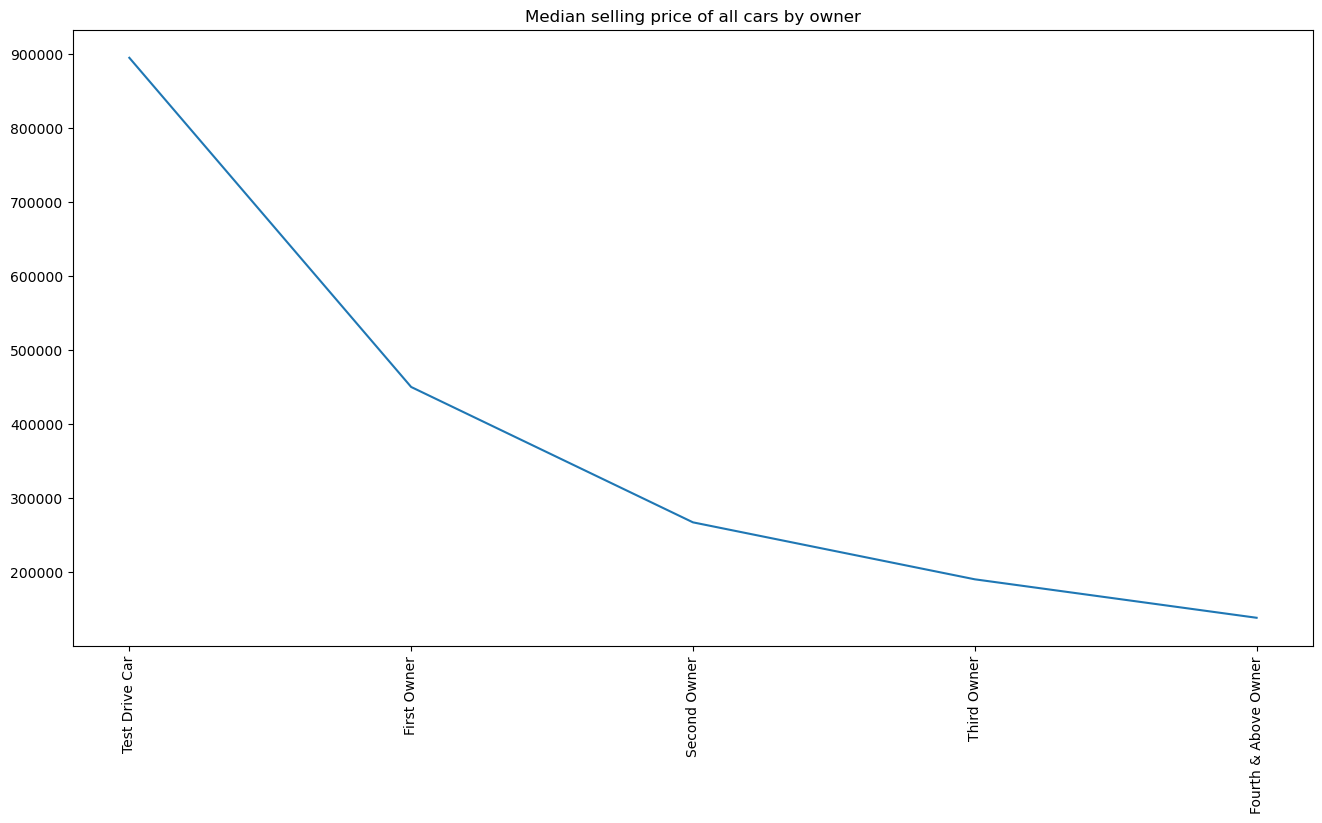

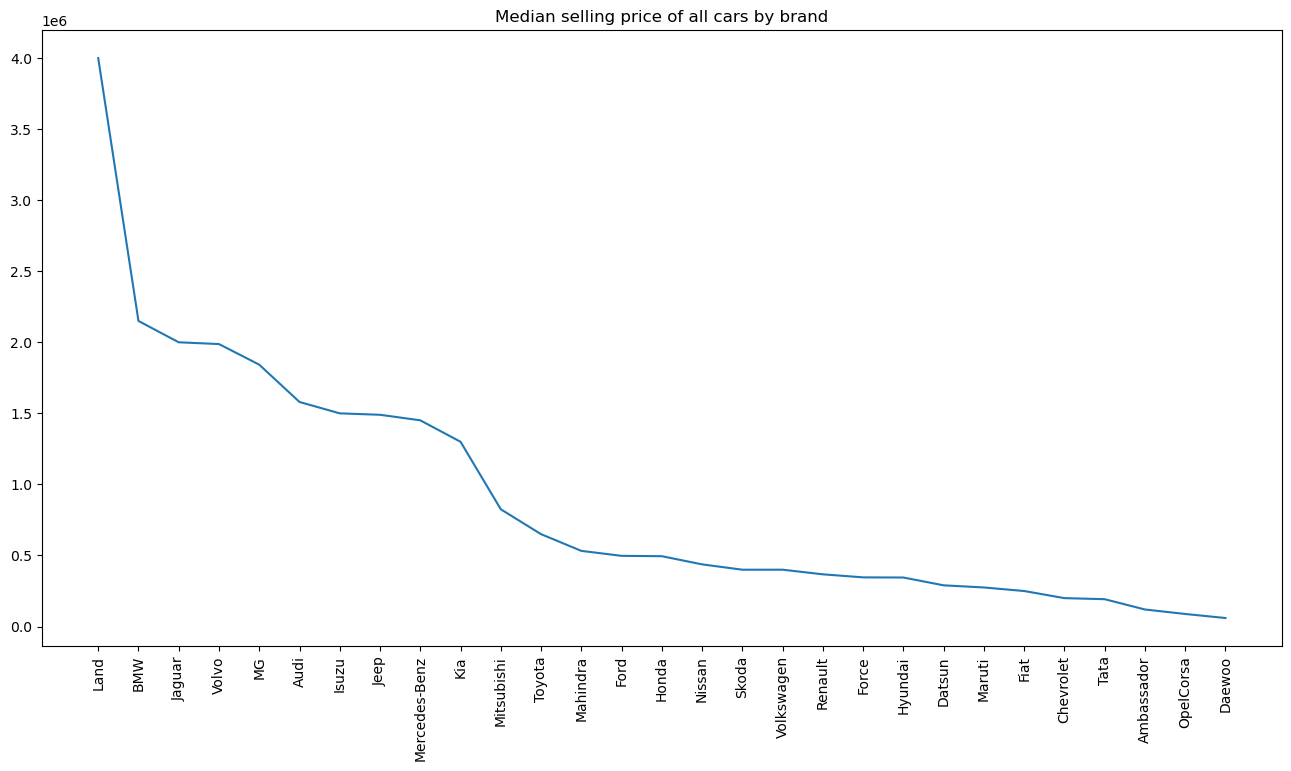

In [21]:
for i in cars_df.columns.drop("selling_price"):
    plt.figure(figsize=(16,8))
    if i == "name":
        median_selling_prices = cars_df[cars_df["name"].isin(list(top_50_cars.index))].groupby("name")["selling_price"].median().sort_values(ascending = False)
        plt.title("Median selling price of Top 50 cars")
    else:
        median_selling_prices = cars_df.groupby(i)["selling_price"].median().sort_values(ascending = False)
        plt.title(f"Median selling price of all cars by {i}")
    plt.plot(median_selling_prices.index ,median_selling_prices.values)
    plt.xticks(rotation =90)
    plt.show()

##### **since the charts looks more volatile for many feature  we will be taking only taking median selling price of cars by brands and median selling price top 50 cars.**

### INSIGHTS OF MEDIAN SELLING PRICE OF CARS:

**By Brand:**

* Median selling price of Maruti is less tahn 5 lakhs though it has highest sales in terms of both count as well as amount.

* And Land and Jaguar cars have  the highest median selling price of more than 35 lakhs and 20 lakhs

**Car Model(only top 50 selling cars in counts):**

* Toyota Innnova 2.5G Diesel 7 seater variant has highest median selling price of more than 7lakhs in the top 50 selling cars.



### **Statistical Summary and Multivatiate Analysis:**

In [22]:
cars_df.describe(include= "O").T

,count,unique,top,freq
name,3577,1491,Maruti Swift Dzire VDI,54
fuel,3577,5,Diesel,1800
seller_type,3577,3,Individual,2832
transmission,3577,2,Manual,3265
owner,3577,5,First Owner,2218
brand,3577,29,Maruti,1072


In [23]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3577.0,2012.962538,4.251759,1992.0,2010.0,2013.0,2016.0,2020.0
selling_price,3577.0,473912.542074,509301.809816,20000.0,200000.0,350000.0,600000.0,8900000.0
km_driven,3577.0,69250.545709,47579.940016,1.0,36000.0,60000.0,90000.0,806599.0


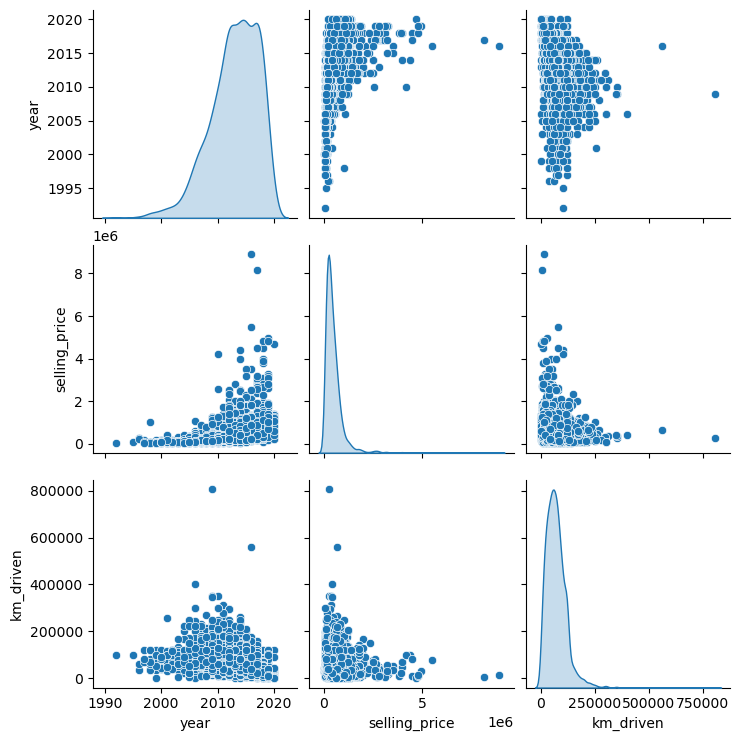

In [24]:
sns.pairplot(data = cars_df,diag_kind ="kde")

<Axes: >

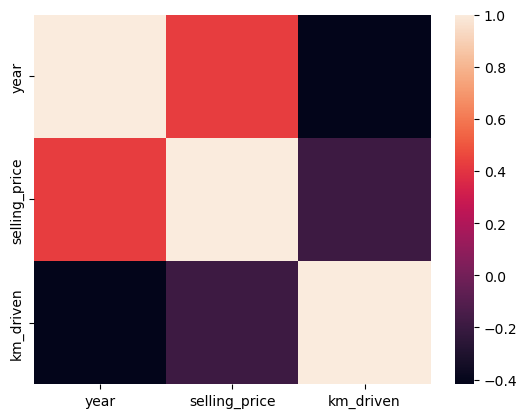

In [25]:
sns.heatmap(data =cars_df.corr(numeric_only= True))

**There is no strong corelation(>0.8) between the features so we are not dropping anything**

## **Data Preparation ,Preprocessing and Model Building**

### outlier handling of Km_driven feature:

<Axes: >

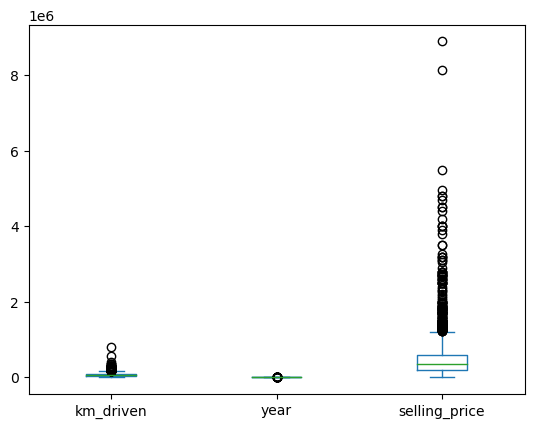

In [26]:
cars_df[["km_driven","year","selling_price"]].plot(kind ="box")

In [27]:
cars_df[cars_df["km_driven"]>300000].count()

name             7
year             7
selling_price    7
km_driven        7
fuel             7
seller_type      7
transmission     7
owner            7
brand            7
dtype: int64

In [28]:
cars_df = cars_df.drop(index = cars_df[cars_df["km_driven"]>300000].index)

### outlier handling of selling price:

In [29]:
cars_df[cars_df["selling_price"]>4000000].count()

name             11
year             11
selling_price    11
km_driven        11
fuel             11
seller_type      11
transmission     11
owner            11
brand            11
dtype: int64

In [30]:
cars_df = cars_df.drop(index = cars_df[cars_df["selling_price"]>4000000].index)

**During the preprocessing phase, I initially applied one-hot encoding across all algorithms. However, I observed that one-hot encoding resulted in poor performance with the linear regression model. To address this, I tried frequency encoding specifically for linear regression to compare the results. Since applying both encoding methods consecutively would require repeating steps like train-test split and scaling, I chose to use frequency encoding only  for linear regression, followed by one-hot encoding for linear regression and all the other algorithms. This approach helps avoid redundancy and ensures consistent preprocessing across models.**

### **Linear Regression with frequency encoding**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

#### **Segregating Target and Features**

In [32]:
y = cars_df["selling_price"]
X = cars_df.drop(columns=["selling_price"])

#### **Frequency encoding:**

In [33]:
X["name"] = X["name"].map(X["name"].value_counts())
X["brand"] = X["brand"].map(X["brand"].value_counts())
X["fuel"] = X["fuel"].map(X["fuel"].value_counts())
X["seller_type"] = X["seller_type"].map(X["seller_type"].value_counts())
X["transmission"] = X["transmission"].map(X["transmission"].value_counts())
X["owner"] = X["owner"].map(X["owner"].value_counts())

#### **Train test split**

In [34]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.30,random_state=3)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.50,random_state=3)

#### **Scaling**

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled_fe = scaler.fit_transform(X_train)
X_val_scaled_fe = scaler.transform(X_val)
X_test_scaled_fe =scaler.transform(X_test)

#### **Linear Regression**

In [36]:
lr_fe_model= LinearRegression()
lr_fe_model.fit(X_train_scaled_fe, y_train)

y_predict = lr_fe_model.predict(X_val_scaled_fe)
lr_fe_model.score(X_val_scaled_fe,y_val)


0.47413272916001237

### **Evaluation Metrics:**

In [37]:
print(mean_absolute_error(y_val,y_predict))
print(np.sqrt(mean_squared_error(y_val,y_predict)))
print(r2_score(y_val,y_predict))

217975.14052322812
364062.7890759992
0.47413272916001237


### **Linear Regression with Onehot encoding**

In [38]:
X = cars_df.drop(columns = "selling_price")
y = cars_df["selling_price"]

In [39]:
print(X.shape)
print(y.shape)

(3559, 8)
(3559,)


In [40]:
cars_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand'],
      dtype='object')

#### **OneHot encoding**

In [41]:
X = pd.get_dummies(X)

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.30,random_state=3)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.50,random_state=3)

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(2491, 1526)
(2491,)
(534, 1526)
(534,)
(534, 1526)
(534,)


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled =scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled,y_train)

y_predict = lr_model.predict(X_val_scaled)

lr_model.score(X_val_scaled,y_val)

-2.512872169891771e+26

In [46]:
print(mean_absolute_error(y_val,y_predict))
print(np.sqrt(mean_squared_error(y_val,y_predict)))
print(r2_score(y_val,y_predict))

2.0530715437318152e+18
7.95835704004753e+18
-2.512872169891771e+26


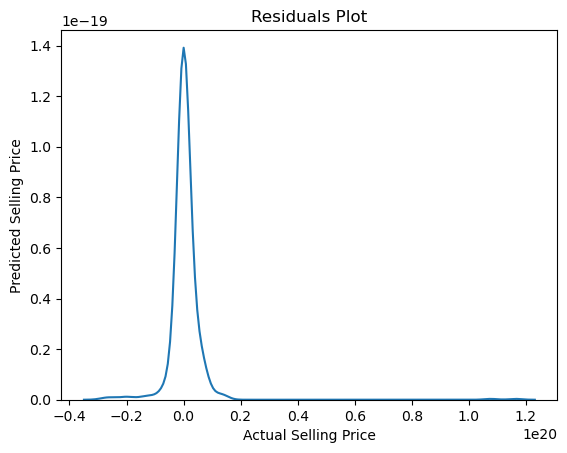

In [47]:
residual = y_val- y_predict
sns.kdeplot(residual)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Residuals Plot")
plt.show()


**we are getting abnormal score in linear regression with one hot encoding,so we will be trying out other models since we are going to try tree based models scaling is not necessary**

### **Decision Tree**

In [48]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=3)
dt_model.fit(X_train,y_train)

y_predict = dt_model.predict(X_val)

dt_model.score(X_val,y_val)

0.6143088538896427

In [49]:
print(mean_absolute_error(y_val,y_predict))
print(np.sqrt(mean_squared_error(y_val,y_predict)))
print(r2_score(y_val,y_predict))

150957.2615480649
311787.03760221973
0.6143088538896427


### **Random Forest**

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=3)
rf_model.fit(X_train,y_train)

y_predict = rf_model.predict(X_val)

rf_model.score(X_val,y_val)

0.7489778800736786

In [51]:
print(mean_absolute_error(y_val,y_predict))
print(np.sqrt(mean_squared_error(y_val,y_predict)))
print(r2_score(y_val,y_predict))

124979.00789642411
251532.5637778853
0.7489778800736786


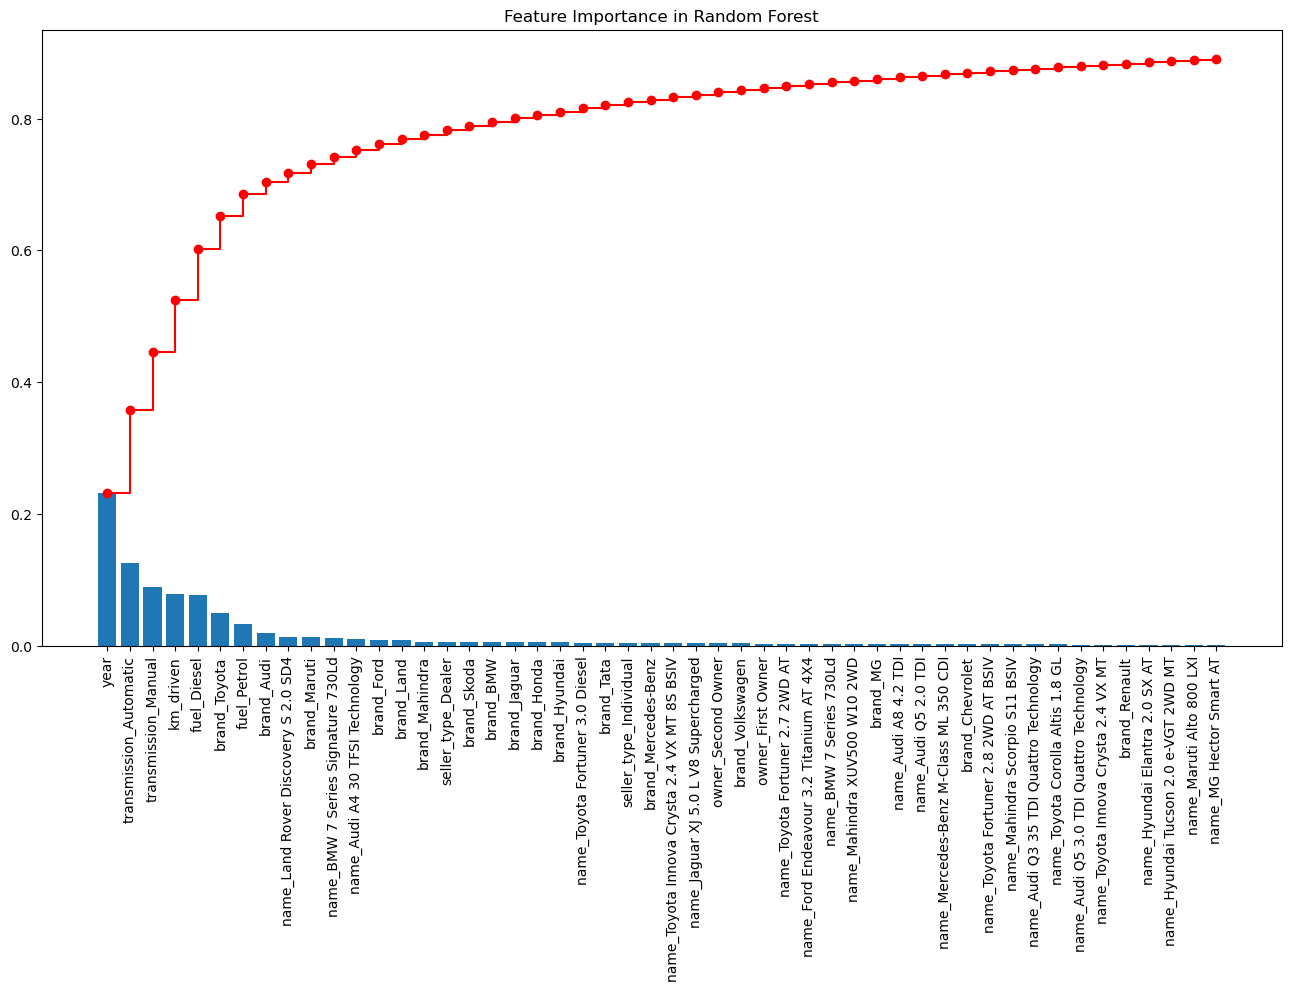

In [52]:
importances = rf_model.feature_importances_
feature_names = X.columns
top_n_features= 50
sorted_indices = np.argsort(importances)[::-1][:top_n_features]
cumulative_importance = np.cumsum(importances[sorted_indices])
plt.figure(figsize=(16,8))
plt.bar(range(top_n_features), importances[sorted_indices], align='center')
plt.step(range(top_n_features), cumulative_importance, where='post', color='r', marker='o', label='Cumulative Importance')
plt.xticks(range(top_n_features), feature_names[sorted_indices], rotation=90)
plt.title('Feature Importance in Random Forest')
plt.show()


In [53]:
cumulative_importance = np.cumsum(importances[sorted_indices])
cumulative_importance

array([0.23170219, 0.35782742, 0.44635322, 0.52496034, 0.60267331,
       0.65174392, 0.68500327, 0.70414349, 0.71753103, 0.73043852,
       0.74204477, 0.75237129, 0.76126812, 0.76931273, 0.77572166,
       0.78200313, 0.78827355, 0.79444847, 0.80055199, 0.80563591,
       0.8106916 , 0.8156457 , 0.82052682, 0.82482884, 0.82884237,
       0.83252685, 0.83615893, 0.83974445, 0.8432667 , 0.84671164,
       0.84961745, 0.8523633 , 0.85506317, 0.85771671, 0.86024945,
       0.86274592, 0.86518512, 0.86758906, 0.86978275, 0.87191232,
       0.87396185, 0.87593875, 0.8778833 , 0.87980503, 0.88171592,
       0.88347439, 0.88522696, 0.88691557, 0.8885768 , 0.89023492])

**Top 50 features contributes almost 90% for the target variable variation and we can clearly see that the top 20 features alone contributes more than 80% of the variation happening in target variable out of 1526 features**

### **XGBOOST**

In [54]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_predict = xgb_model.predict(X_val)
xgb_model.score(X_val,y_val)

0.7706127132123343

In [55]:
print(mean_absolute_error(y_val,y_predict))
print(np.sqrt(mean_squared_error(y_val,y_predict)))
print(r2_score(y_val,y_predict))

123625.34384509598
240448.95460488822
0.7706127132123343


In [56]:
feature_names = X.columns
top50_features = feature_names[sorted_indices]
xgb_model_top50 = XGBRegressor()
xgb_model_top50.fit(X_train[top50_features], y_train)
y_predict= xgb_model_top50.predict(X_val[top50_features])
xgb_model_top50.score(X_val[top50_features], y_val)

0.7536815204513361

In [57]:
print(mean_absolute_error(y_val,y_predict))
print(np.sqrt(mean_squared_error(y_val,y_predict)))
print(r2_score(y_val,y_predict))

135652.3195590473
249164.817120828
0.7536815204513361


## **Final Model with Tuning:**

### **Hyperparameter tuning Using RandomisedSearchCV**

**From the above we can see out best model is XGBoost with all features so we will be using that for Tuning**

In [58]:
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [59]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
    'learning_rate': stats.uniform(0.01, 0.5),
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 6, 9, 12],
    'alpha': [0, 1, 5, 10],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5]
}

X_combined = pd.concat([X_train,X_val])
y_combined = pd.concat([y_train, y_val])

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error', cv=3,)
random_search.fit(X_combined, y_combined)

best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")

Best Parameters: {'alpha': 10, 'gamma': 0.2, 'learning_rate': 0.2885461382630671, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.5}


In [60]:
print(f"Best Score: {np.sqrt(-1*best_score)}")

Best Score: 210800.48742038652


### **Pipeline For our Final Model**:

In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(),XGBRegressor(**best_params))

In [62]:
pipe.fit(X_combined,y_combined)
y_predict = pipe.predict(X_test)
pipe.score(X_test,y_test)

0.7323834393874675

**We could be thinking that without tuning itself we have higher performance in XGBoost but it was tested on Validation data not on test data which was completely unseen by any models other than our tuned model.so to clarify this you could see below how the normal model without tuning performs on test data.**

### **XGBOOST without Tuning**

In [63]:
y_predict = xgb_model.predict(X_test)
xgb_model.score(X_test,y_test)

0.6630005650617374

In [64]:
print(mean_absolute_error(y_test,y_predict))
print(np.sqrt(mean_squared_error(y_test,y_predict)))
print(r2_score(y_test,y_predict))

129357.62343457396
218582.38113817386
0.6630005650617374


**From above we can clearly see that the  model without tuning performs worse than Tuned model**

### **Model Performance Comparison**

#### **Here we are just going to plot the results to compare the peroformance of the model .same as from above we will be using the validation set for testing for all algorithms ,except for the last hyperparmater tuned model where we use the unnseen test data**

In [65]:
def reg_plot(model_name, y_pred, y_test, color, marker):
    fig = sns.regplot(x = y_test, y = y_pred, color=color, marker=marker)
    fig.set(title = model_name, xlabel = 'Actual Price of Used Cars in (INR)', ylabel = 'Predicted Price of the used cars in (INR)')

In [66]:
def evaluate(y_true, y_pred):
    MAE = round(mean_absolute_error(y_true, y_pred), 2)
    MSE = round(mean_squared_error(y_true, y_pred), 2)
    RMSE = round(np.sqrt(MSE), 2)
    r2 = round(r2_score(y_true, y_pred), 2)
    
    print('MAE: ', MAE)
    print('MSE: ', MSE)
    print('RMSE: ', RMSE)
    print('Rsquare Score: ', r2)

### **On validation data**

### Linear Regression Model(Frequency encoding)

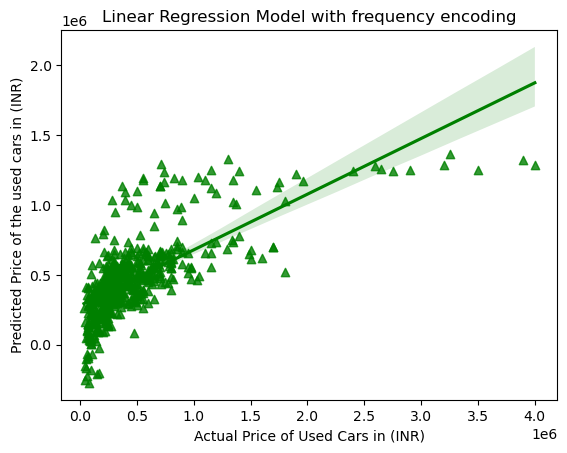

In [67]:
predictions_linear_regression = lr_fe_model.predict(X_val_scaled_fe)
reg_plot('Linear Regression Model with frequency encoding', predictions_linear_regression, y_val, 'green', '^')

In [68]:
evaluate(y_val , predictions_linear_regression)

MAE:  217975.14
MSE:  132541714389.8
RMSE:  364062.79
Rsquare Score:  0.47


### Linear Regression Model(onehot encoding)

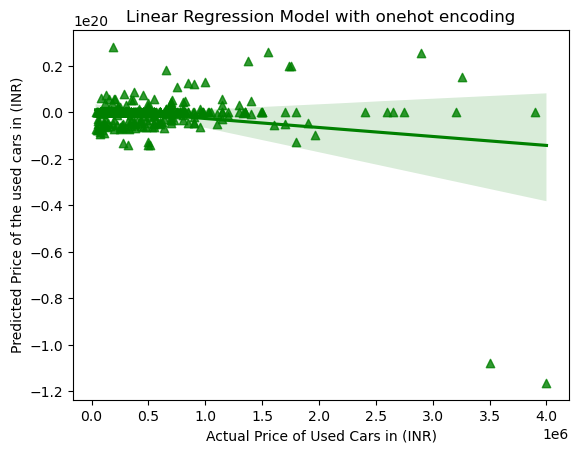

In [69]:
predictions_linear_regression = lr_model.predict(X_val_scaled)
reg_plot('Linear Regression Model with onehot encoding', predictions_linear_regression, y_val, 'green', '^')

In [70]:
evaluate(y_val ,predictions_linear_regression)

MAE:  2.0530715437318152e+18
MSE:  6.333544677687409e+37
RMSE:  7.95835704004753e+18
Rsquare Score:  -2.512872169891771e+26


### **Decision Tree**

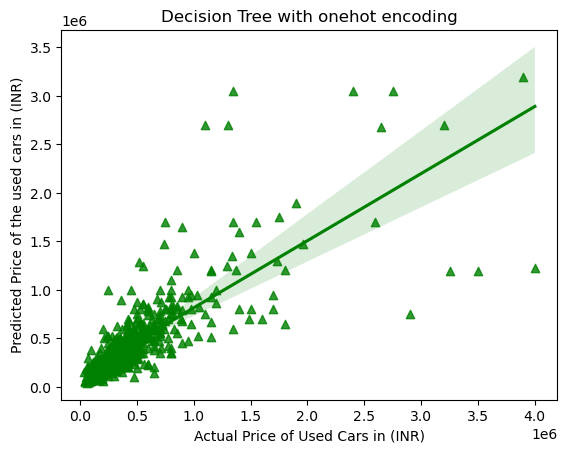

In [71]:
predictions_decision_tree = dt_model.predict(X_val)
reg_plot('Decision Tree with onehot encoding', predictions_decision_tree, y_val, 'green', '^')

In [72]:
evaluate(y_val , predictions_decision_tree)

MAE:  150957.26
MSE:  97211156816.77
RMSE:  311787.04
Rsquare Score:  0.61


### **Random Forest**

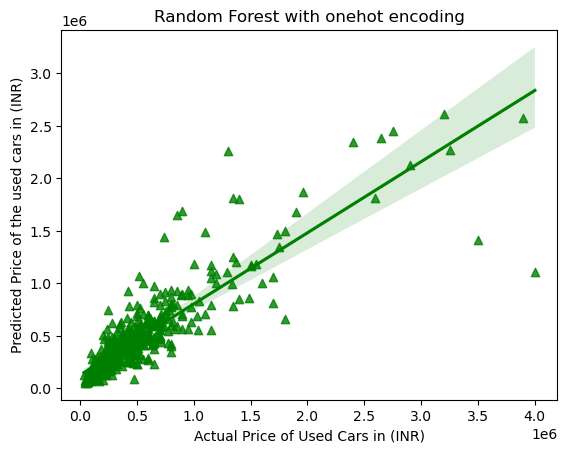

In [73]:
predictions_random_forest = rf_model.predict(X_val)
reg_plot('Random Forest with onehot encoding', predictions_random_forest, y_val, 'green', '^')

In [74]:
evaluate(y_val, predictions_random_forest)

MAE:  124979.01
MSE:  63268630640.68
RMSE:  251532.56
Rsquare Score:  0.75


### **XGBoost**

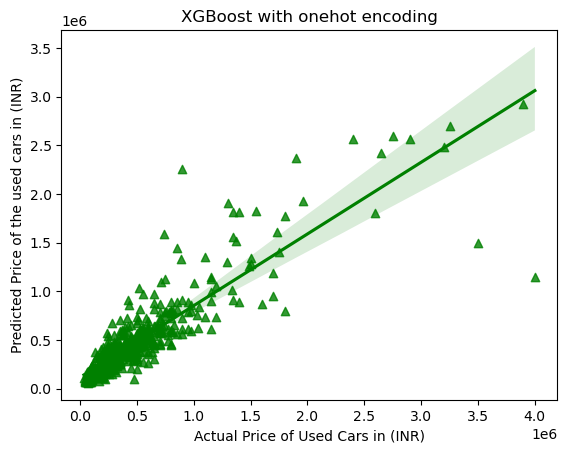

In [75]:
predictions_xgboost = xgb_model.predict(X_val)
reg_plot('XGBoost with onehot encoding', predictions_xgboost, y_val, 'green', '^')

In [76]:
evaluate(y_val ,predictions_xgboost)

MAE:  123625.34
MSE:  57815699770.58
RMSE:  240448.95
Rsquare Score:  0.77


### **XGBoost with Top 50 features**

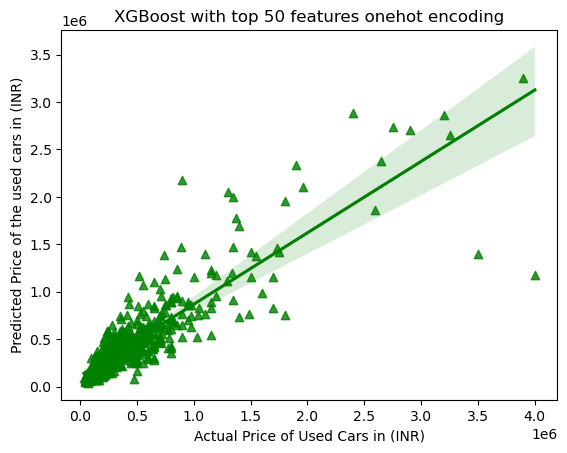

In [77]:
predictions_xgboost_top50 = xgb_model_top50.predict(X_val[top50_features])
reg_plot('XGBoost with top 50 features onehot encoding', predictions_xgboost_top50, y_val, 'green', '^')

In [78]:
evaluate(y_val , predictions_xgboost_top50)

MAE:  135652.32
MSE:  62083106090.86
RMSE:  249164.82
Rsquare Score:  0.75


### **On Test data**

### **1) Hyperparameter Tuned XGBoost**

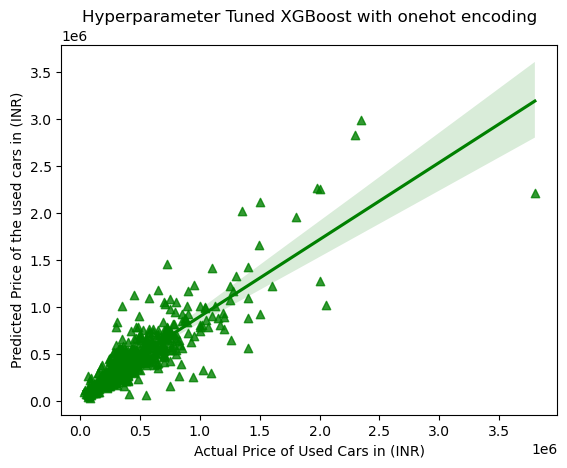

In [79]:
predictions_xgboost = pipe.predict(X_test)
reg_plot('Hyperparameter Tuned XGBoost with onehot encoding', predictions_xgboost, y_test, 'green', '^')

In [80]:
evaluate(y_test , predictions_xgboost )

MAE:  117712.57
MSE:  37941466889.44
RMSE:  194785.69
Rsquare Score:  0.73


##### **We could be thinking that without tuning itself we have higher performance in XGBoost but it was tested on Validation data not on test data which was completely unseen by any models other than our tuned model.so to clarify this you could see below how the normal model without tuning performs on test data.**

### **2) XGBOOST without Tuning**

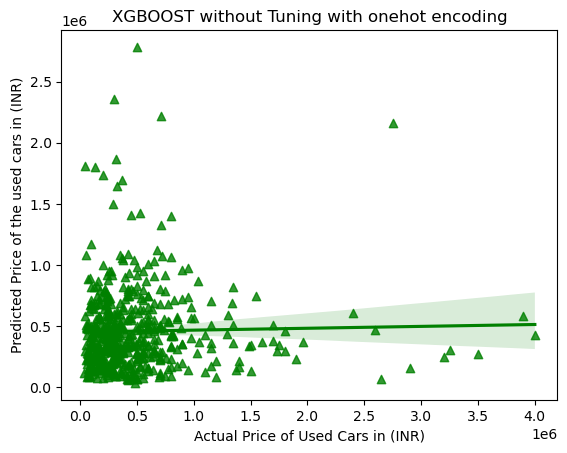

In [81]:
predictions_xgboost = xgb_model.predict(X_test)
reg_plot('XGBOOST without Tuning with onehot encoding', predictions_xgboost, y_val, 'green', '^')

In [82]:
evaluate(y_test,predictions_xgboost)

MAE:  129357.62
MSE:  47778257344.03
RMSE:  218582.38
Rsquare Score:  0.66


## **CONCLUSION:**

* So our best model is **Hyper parameter tuned XGBOOST** with Rsquared score of **75%** approximately which is Far Better and considering Where the  **Linear regression** with worst performance of **-8 %** approximately.

* We could get better performace if we had more technical features to learn  by the model as we had only km driven and transmission only for now.


#### **INSIGHTS From Univariate Analysis:**

1.  No of cars based on **Fuel Type** are: 
    * Top two are **Diesel** (1,800 cars) 50.15%  and **Petrol** (1,717 cars) 48.15%.  
    * Combined they account for more than **98%** of the cars by fuel type.
    ----
2.  No of cars based on **Transmission Type** are:
    * **Manual** (3,265 cars) 91.6%  and **Automatic** (312 cars) 8.4%.
    ----
3. No of cars based on **Owner Type** are:
    * Top two are **First owner** (2,218 cars) 61.9%  and **Second owner** (978 cars) 27.4%.  
    * Combined they account for more than **88%** of the cars by owner type.
    ----
4. No of cars based on **Seller Type** are:
    * **Individual** (2,832 cars) 79.3% and **Dealer** (712 cars) 19.7%.
    ----
5. No of cars based on **Year the car was bought** are:
    * Top five Years are from **2017** (346 cars) 9.6%, **2012** (338 cars) 9.4%, **2015** (332 cars) 9.3%, **2014** (321  cars)   8.9%, **2013** (298 cars) 8.3%.  
    * Combined they account for more than **45%** of the cars sold by owners based on the year the cars were bought.
    ----
6. **Top 5 selling cars based on the model** are:
    * **Maruti Swift Dzire** VDI (54 cars) 1.51%
    * **Maruti Alto 800 LXI** (48 cars) 1.34%
    * **Maruti Alto LXi** (42 cars) 1.18%
    * **Maruti Alto LX** (30 cars) 0.84% 
    * **Maruti Swift VDI BSIV** (28 cars) 0.78%
    * **Hyundai EON Era Plus** (28 cars) 0.78%
    * **Since 5th place was shared by both Hyundai and Maruti, we have 6 cars that account for more than 5% of total cars           sold.** 
    ---- 
7. **Top 5 selling cars based on the Brand** are:
    * **Maruti** (1072 cars) 30%
    * **Hyundai** (637 cars) 17.8%
    * **Mahindra** (328 cars) 9.2%
    * **Tata** (308 cars) 8.6% 
    * **Ford** (220 cars) 6.1% 
    
  **These top 5 brands account for more than 70% of the cars sold.**


### **Insights From Bivariate Analysis By Total Sales:**

* **Total** sales of all cars amount to **163.3 crores INR**
 
* out of which  **Maruti** Brand cars alone sold for close to **35 crores INR** and Maruti **swift Dzire vdi**  alone sold   for more than **25 crores INR**

* **Diesel** Based cars sold for more than **100 crores INR**

* **Individual** seller and **First owner** sold for close to 100 crores INR, so we can infer that most of the cars sold by first owner are sold by them itself not through dealer
 
* **Manual** Transmission cars are sold for more than **120 crores INR**

### INSIGHTS OF MEDIAN SELLING PRICE OF CARS:

**By Brand:**

* Median selling price of Maruti is less tahn 5 lakhs though it has highest sales in terms of both count as well as amount.

* And Land and Jaguar cars have  the highest median selling price of more than 35 lakhs and 20 lakhs

**Car Model(only top 50 selling cars in counts):**

* Toyota Innnova 2.5G Diesel 7 seater variant has highest median selling price of more than 7lakhs in the top 50 selling cars.

In [83]:
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(alpha=10, base_score=None, booster=None,
                              callbacks=None, colsample_bylevel=None,
                              colsample_bynode=None, colsample_bytree=None,
                              device=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0.2, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.2885461382630671, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=6, max_leaves=None,
                              min_child_weight=1, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [84]:
import joblib
joblib.dump(pipe,"model.pkl")

['model.pkl']

In [85]:
cars_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand'],
      dtype='object')

In [86]:
cars_df.to_csv('updated_cars_data.csv', index=False)
